## Library

In [315]:
library(MASS)
library(class)
library(glmnet)

# 1. FGL

> # Data

In [316]:
help(fgl)

fgl {MASS},R Documentation


In [317]:
df1 = fgl
head(df1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3.01,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,WinF
2,-0.39,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,WinF
3,-1.82,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,WinF
4,-0.34,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,WinF
5,-0.58,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,WinF
6,-2.04,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,WinF


In [318]:
table(df1[10])


 WinF WinNF   Veh   Con  Tabl  Head 
   70    76    17    13     9    29 

Terdapat 9 features, dan 6 kategori pada label

> # Boxplot

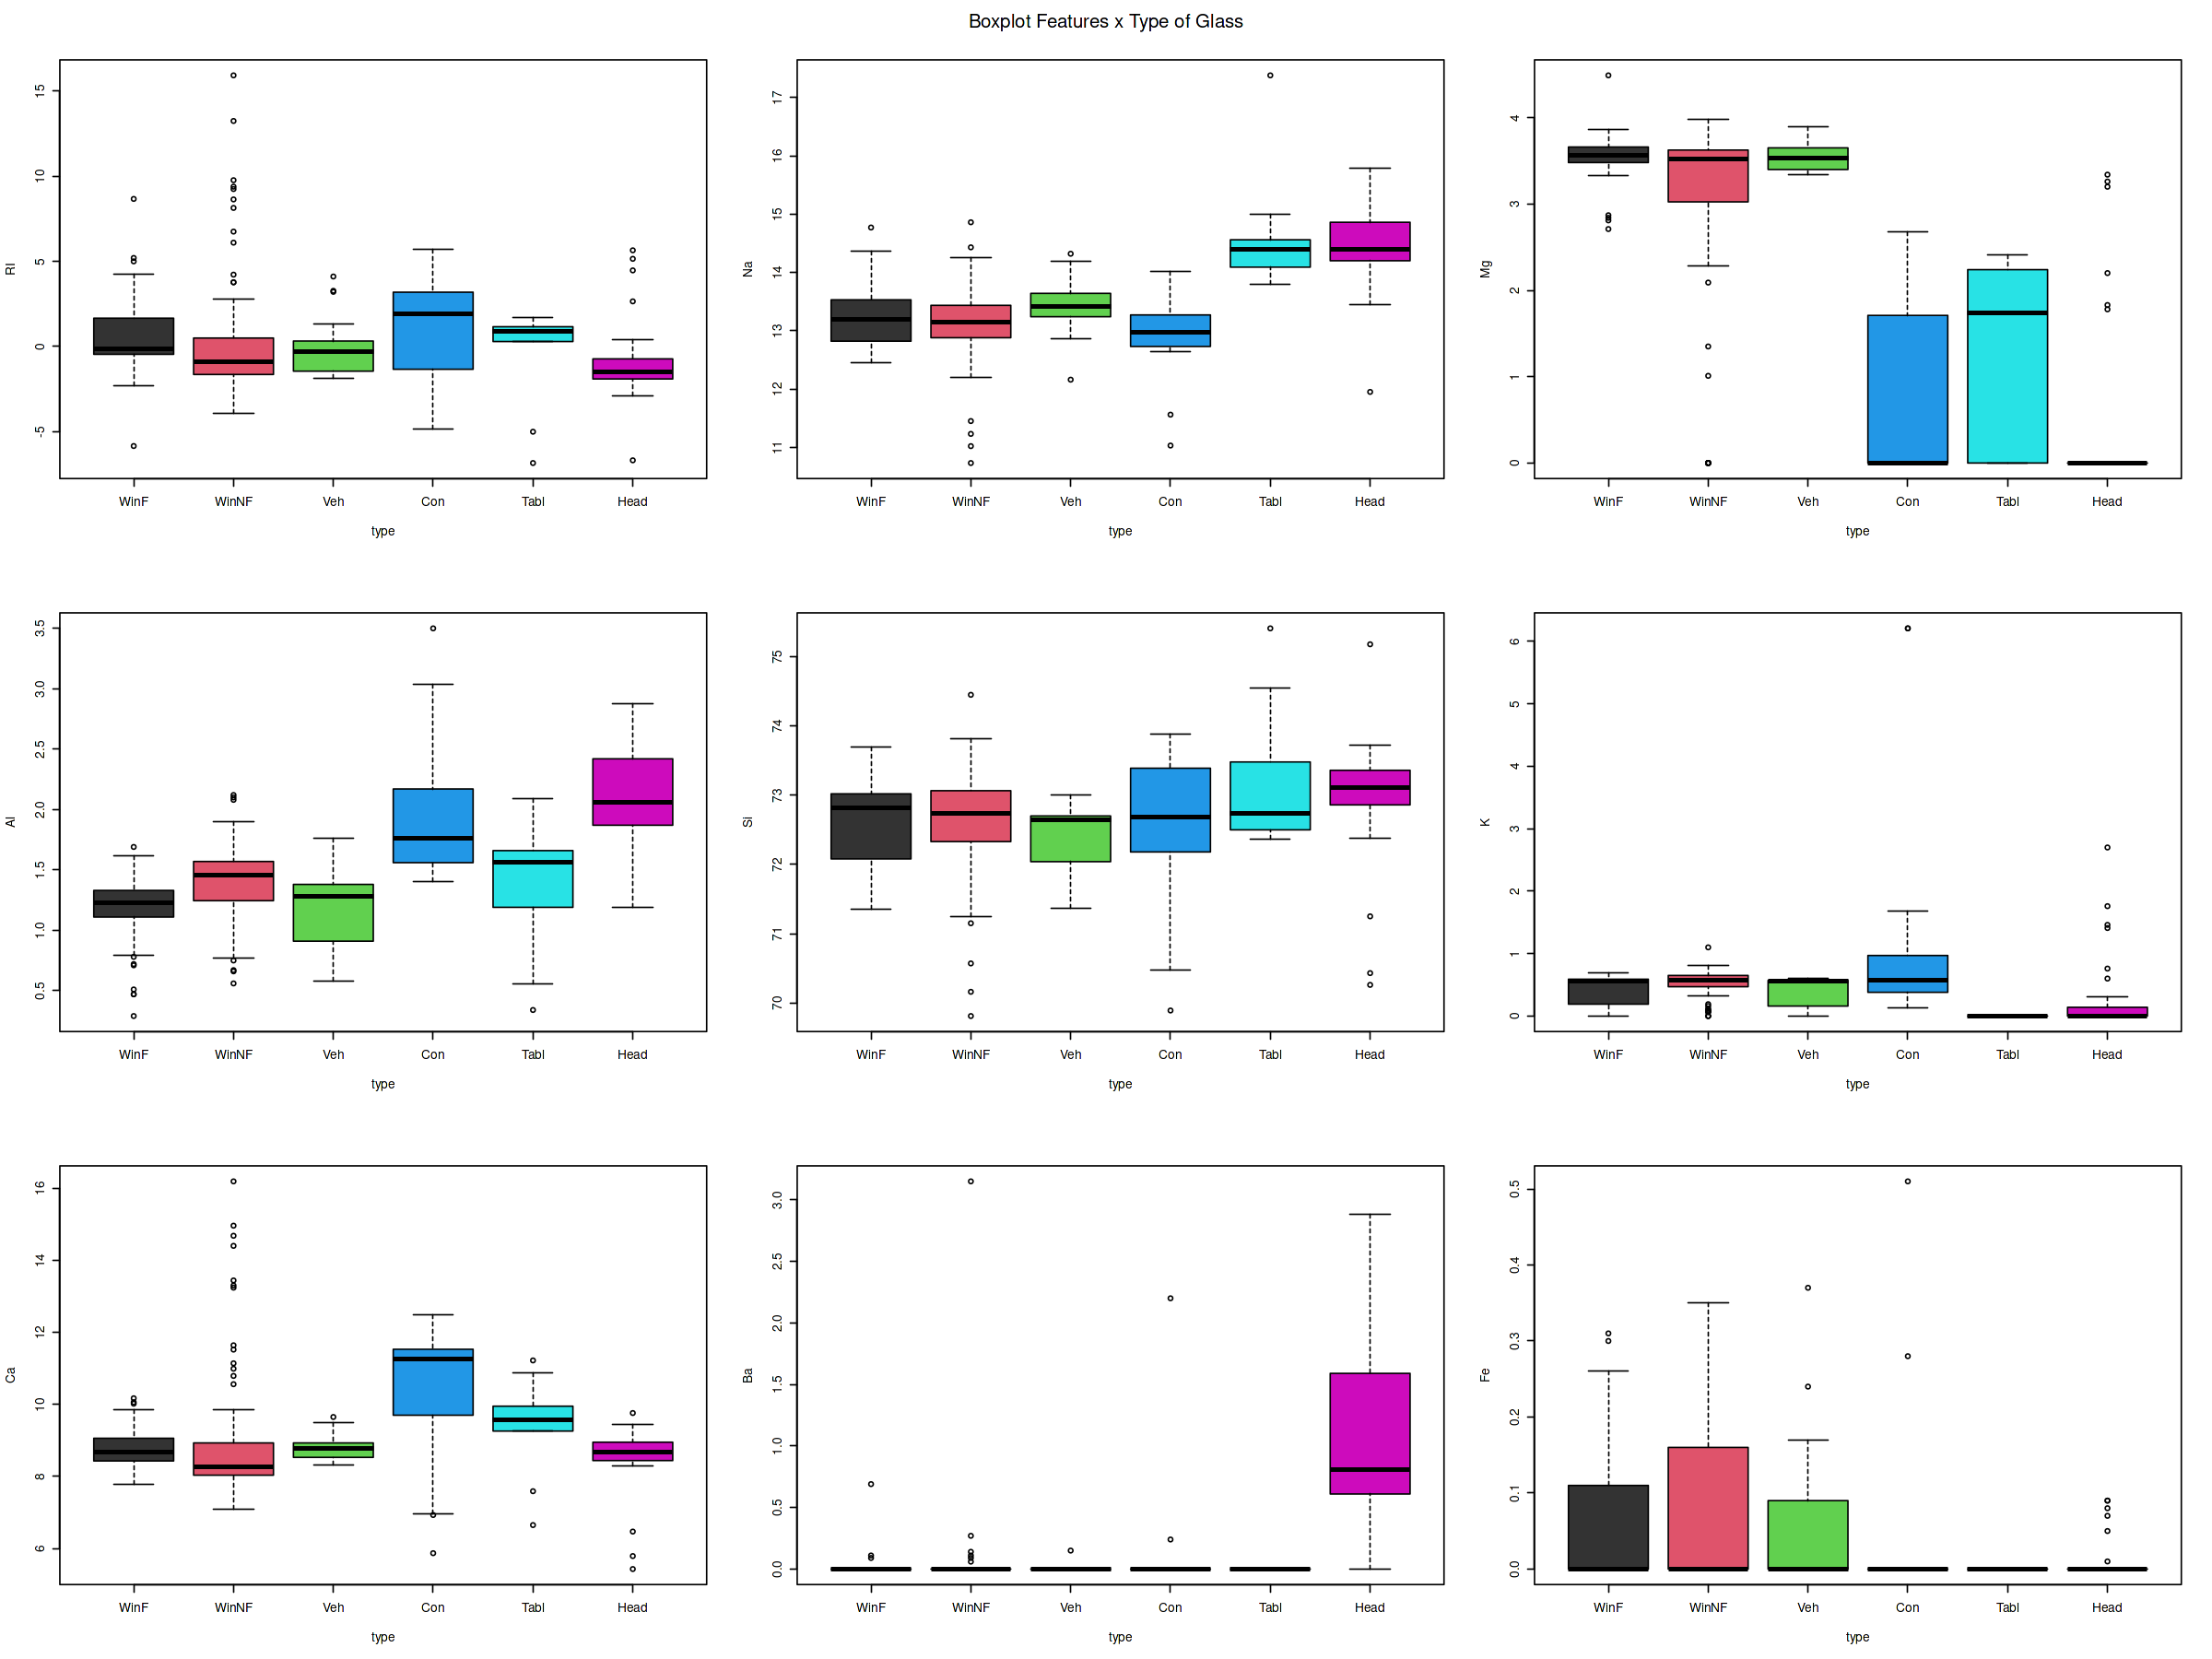

In [319]:
options(repr.plot.width = 20, repr.plot.height = 15)
par(mfrow = c(3,3))
plot(RI~type, data = df1, col=c(grey(.2),2:6))
plot(Na~type, data = df1, col=c(grey(.2),2:6))
plot(Mg~type, data = df1, col=c(grey(.2),2:6))
plot(Al~type, data = df1, col=c(grey(.2),2:6))
plot(Si~type, data = df1, col=c(grey(.2),2:6))
plot(K~type, data = df1, col=c(grey(.2),2:6))
plot(Ca~type, data = df1, col=c(grey(.2),2:6))
plot(Ba~type, data = df1, col=c(grey(.2),2:6))
plot(Fe~type, data = df1, col=c(grey(.2),2:6))
mtext("Boxplot Features x Type of Glass", side = 3, line = -2, outer = TRUE)

Okei, untuk Ba x type; Fe x type; K x type; Mg x type sangat susah terlihat dan terdapat beberapa type yang terlalu dominan. Artinya? Kita perlu lakukan standardisasi/scaling

> # Scaling

In [320]:
help(apply)

apply {base},R Documentation
X,"an array, including a matrix."
MARGIN,"a vector giving the subscripts which the function will be applied over. E.g., for a matrix 1 indicates rows, 2 indicates columns, c(1, 2) indicates rows and columns. Where X has named dimnames, it can be a character vector selecting dimension names."
FUN,"the function to be applied: see ‘Details’. In the case of functions like +, %*%, etc., the function name must be backquoted or quoted."
...,optional arguments to FUN.


In [321]:
x <- scale(df1[,1:9]) # column 10 is the class label
apply(x, 2, sd) # okei aman

RI Na Mg Al Si  K Ca Ba Fe 
 1  1  1  1  1  1  1  1  1

In [322]:
df2 = as.data.frame(x)
df2 = cbind(df2, type = df1$type)
head(df2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.8708258,0.2842867,1.2517037,-0.6908222,-1.12444556,-0.67013422,-0.1454254,-0.3520514,-0.5850791,WinF
2,-0.2487502,0.5904328,0.6346799,-0.1700615,0.10207972,-0.02615193,-0.7918771,-0.3520514,-0.5850791,WinF
3,-0.7196308,0.1495824,0.6000157,0.1904651,0.43776033,-0.16414813,-0.8270103,-0.3520514,-0.5850791,WinF
4,-0.2322859,-0.2422846,0.6970756,-0.3102663,-0.05284979,0.11184428,-0.5178378,-0.3520514,-0.5850791,WinF
5,-0.3113148,-0.1688095,0.6485456,-0.4104126,0.55395746,0.08117845,-0.6232375,-0.3520514,-0.5850791,WinF
6,-0.7920739,-0.7566101,0.6416128,0.3506992,0.41193874,0.21917466,-0.6232375,-0.3520514,2.0832652,WinF


> # Split Data

Digunakan 70% data sebagai train data dan 30% data sebagai test data

In [323]:
# Biar Hasil Sama
set.seed(123)

# 70% train and 30% test
sampel = sample(2, nrow(df2), replace = TRUE, prob = c(0.7, 0.3))
train = df2[sampel == 1,]
test = df2[sampel == 2,]
dim(train); dim(test)

[1] 157  10

[1] 57 10

# KNN

In [324]:
# Execution of k-NN with k=1
k1 = knn(train[,-10], test[,-10], train$type, k = 1)

# Execution of k-NN with k=2
k2 = knn(train[,-10], test[,-10], train$type, k = 2)

# Execution of k-NN with k=3
k3 = knn(train[,-10], test[,-10], train$type, k = 3)

# Execution of k-NN with k=4
k4 = knn(train[,-10], test[,-10], train$type, k = 4)

# Execution of k-NN with k=5
k5 = knn(train[,-10], test[,-10], train$type, k = 5)

> # Evaluasi

In [325]:
# k = 1
table(test$type, k1)
cat("\n Akurasi k1 : ", sum(k1 == test$type)/length(test$type)*100, "%")

       k1
        WinF WinNF Veh Con Tabl Head
  WinF    19     2   1   0    0    0
  WinNF    4    12   3   2    0    0
  Veh      1     1   0   0    0    0
  Con      0     0   0   3    0    0
  Tabl     0     0   0   0    2    1
  Head     1     1   0   1    0    3


 Akurasi k1 :  68.42105 %

In [326]:
# k = 2
table(test$type, k2)
cat("\n Akurasi k2 : ", sum(k2 == test$type)/length(test$type)*100, "%")

       k2
        WinF WinNF Veh Con Tabl Head
  WinF    18     3   1   0    0    0
  WinNF    5    12   2   2    0    0
  Veh      1     1   0   0    0    0
  Con      0     0   0   2    0    1
  Tabl     0     0   0   1    1    1
  Head     2     1   0   0    0    3


 Akurasi k2 :  63.15789 %

In [327]:
# k = 3
table(test$type, k3)
cat("\n Akurasi k3 : ", sum(k3 == test$type)/length(test$type)*100, "%")

       k3
        WinF WinNF Veh Con Tabl Head
  WinF    19     2   1   0    0    0
  WinNF    6    11   3   1    0    0
  Veh      1     1   0   0    0    0
  Con      0     0   0   3    0    0
  Tabl     0     0   0   0    2    1
  Head     1     1   0   1    0    3


 Akurasi k3 :  66.66667 %

In [328]:
# k = 4
table(test$type, k4)
cat("\n Akurasi k4 : ", sum(k4 == test$type)/length(test$type)*100, "%")

       k4
        WinF WinNF Veh Con Tabl Head
  WinF    15     6   1   0    0    0
  WinNF    6    12   1   2    0    0
  Veh      1     1   0   0    0    0
  Con      0     0   0   3    0    0
  Tabl     0     0   0   0    2    1
  Head     1     1   0   1    0    3


 Akurasi k4 :  61.40351 %

In [329]:
# k = 5
table(test$type, k5)
cat("\n Akurasi k5 : ", sum(k5 == test$type)/length(test$type)*100, "%")

       k5
        WinF WinNF Veh Con Tabl Head
  WinF    18     3   1   0    0    0
  WinNF    7    12   0   2    0    0
  Veh      1     1   0   0    0    0
  Con      0     0   0   2    0    1
  Tabl     0     0   0   0    2    1
  Head     1     2   0   0    0    3


 Akurasi k5 :  64.91228 %

> # Hasil

Berdasarkan akurasi, diperoleh model terbaik menggunakan knn dengan k = 1 dan akurasi = 68.42%

In [330]:
hasil = data.frame(test = test$type, k1, k2, k3, k4, k5)
hasil

test,k1,k2,k3,k4,k5
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
WinF,WinNF,WinNF,WinNF,WinNF,WinNF
WinF,WinF,WinNF,WinF,WinNF,WinF
WinF,WinF,WinF,WinF,WinF,WinF
WinF,WinF,WinF,WinF,WinF,WinF
WinF,WinF,WinF,WinF,WinNF,WinNF
WinF,WinF,WinF,WinF,WinF,WinF
WinF,Veh,Veh,WinNF,WinNF,WinNF
WinF,WinNF,WinNF,WinF,WinNF,WinF
WinF,WinF,WinF,WinF,WinF,WinF


# MLR

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message:
“from glmnet C++ code (error code -92); Convergence for 92th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


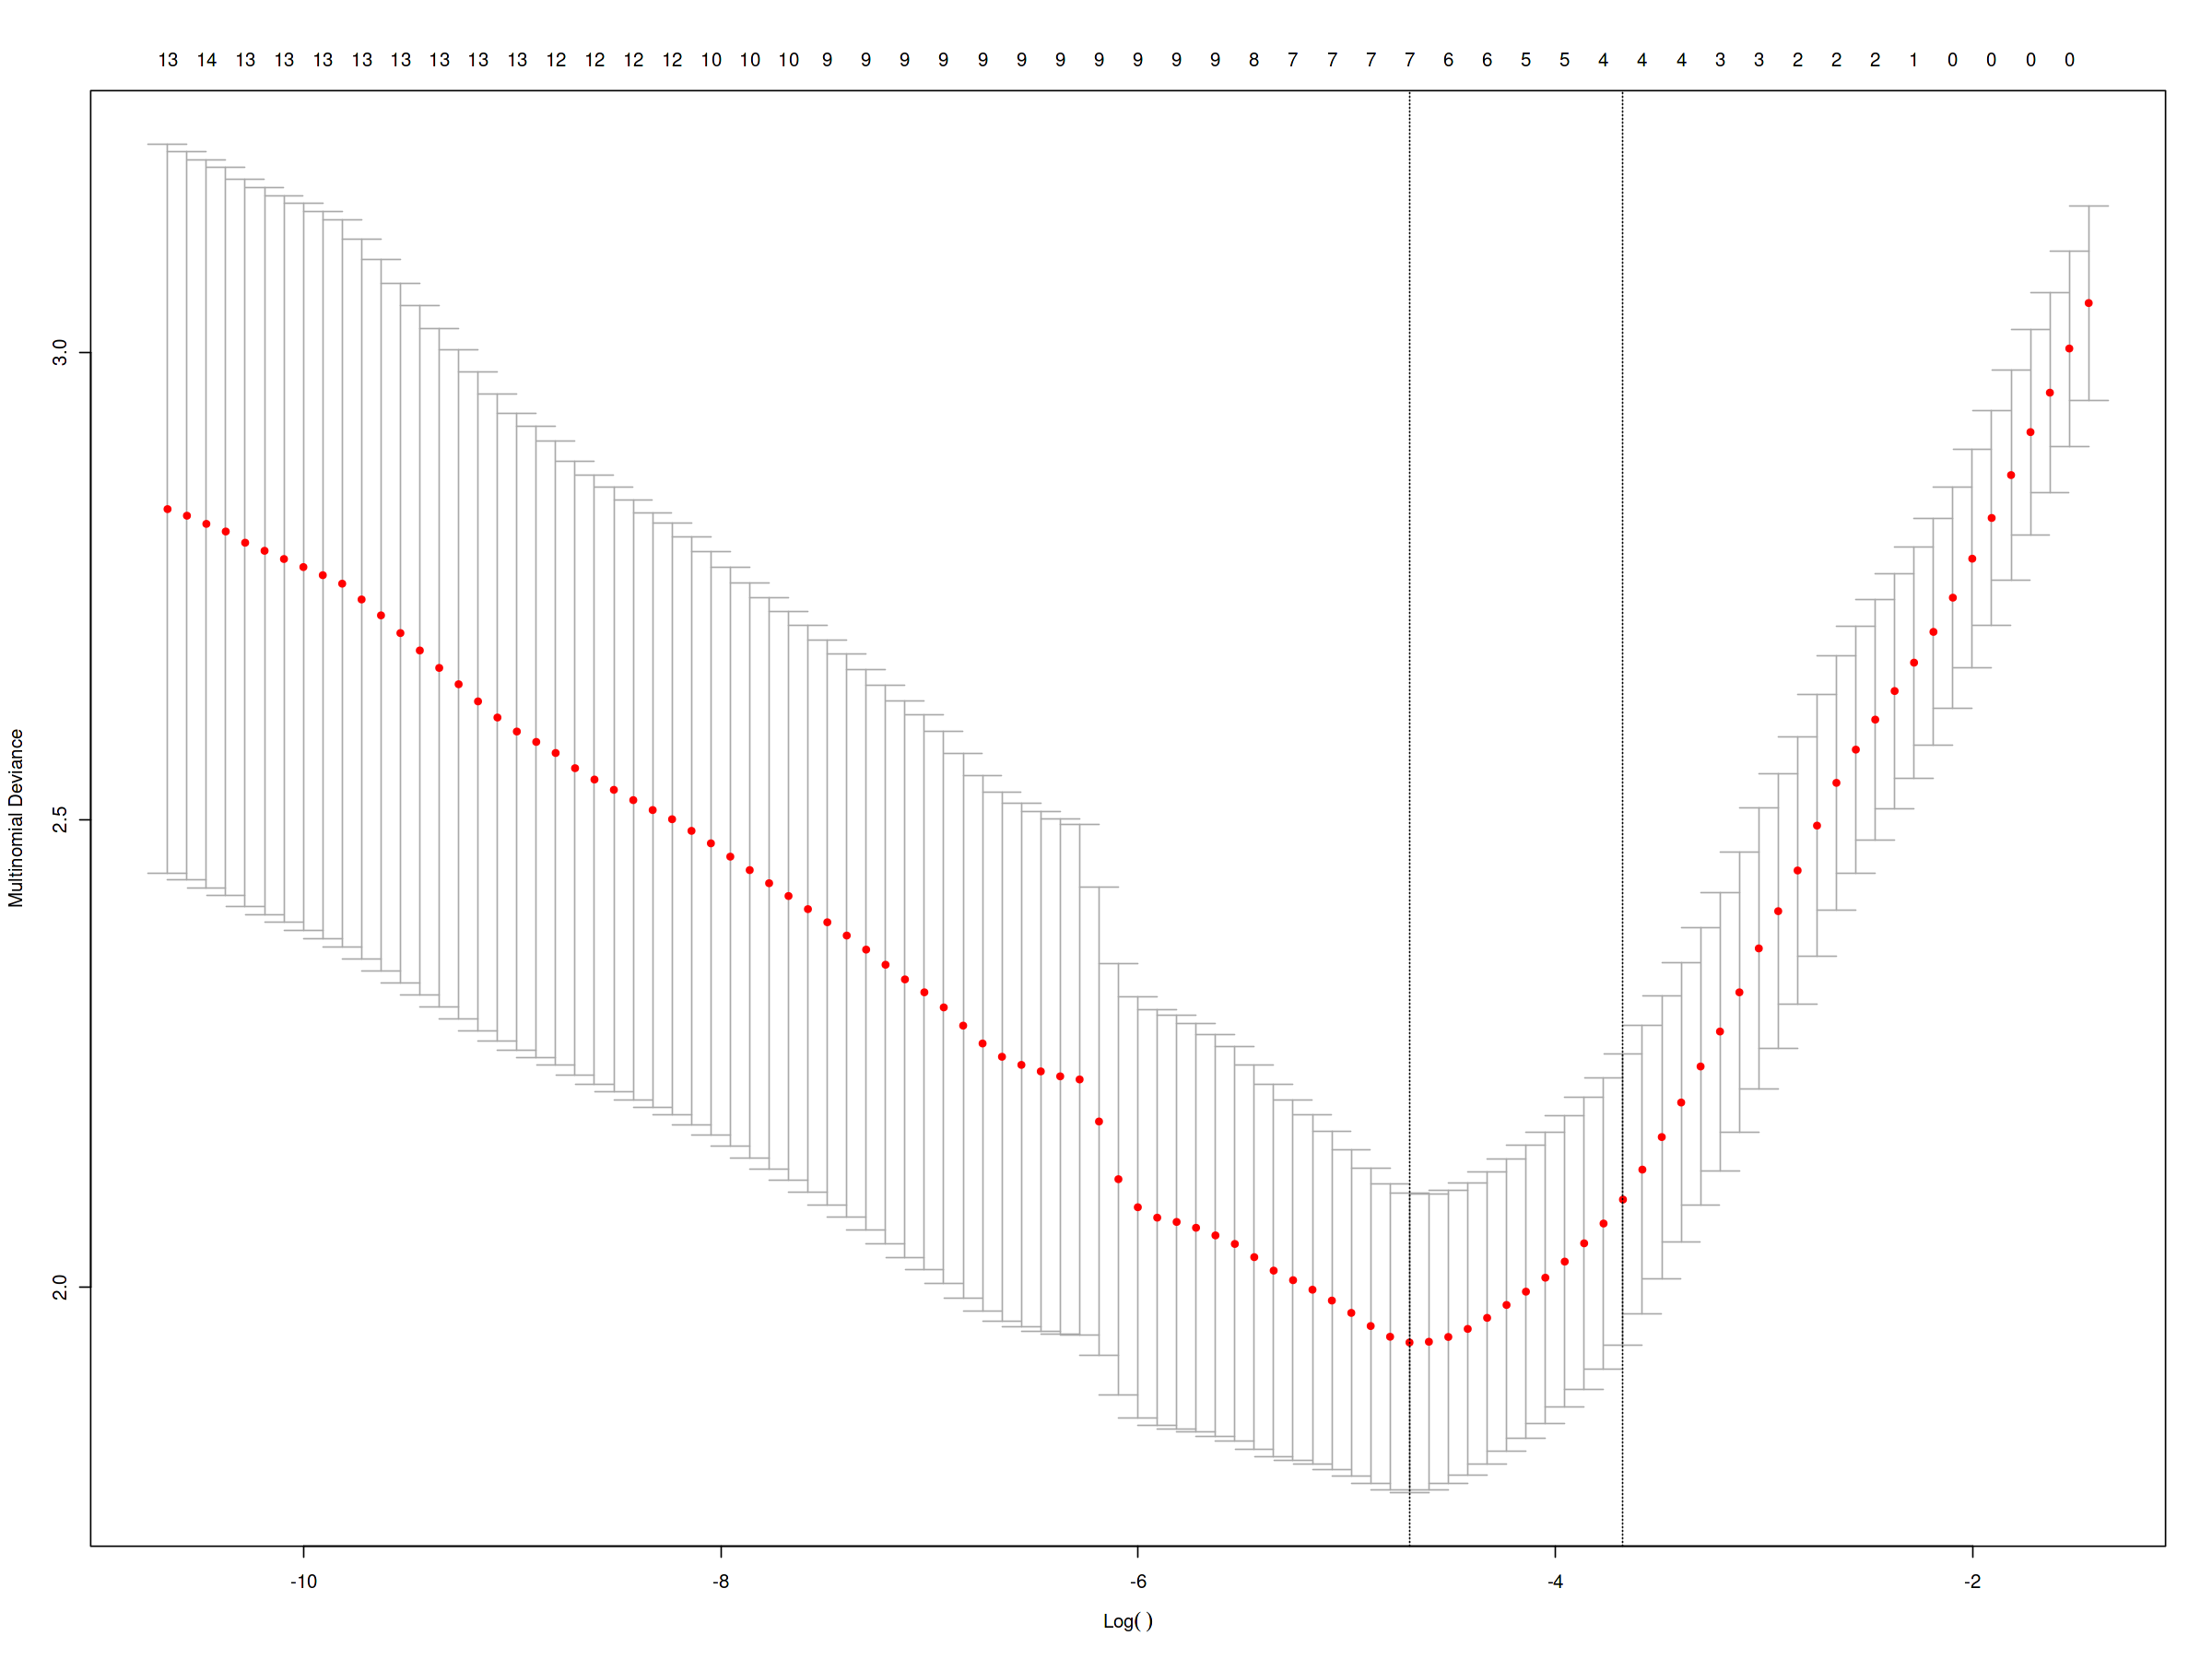

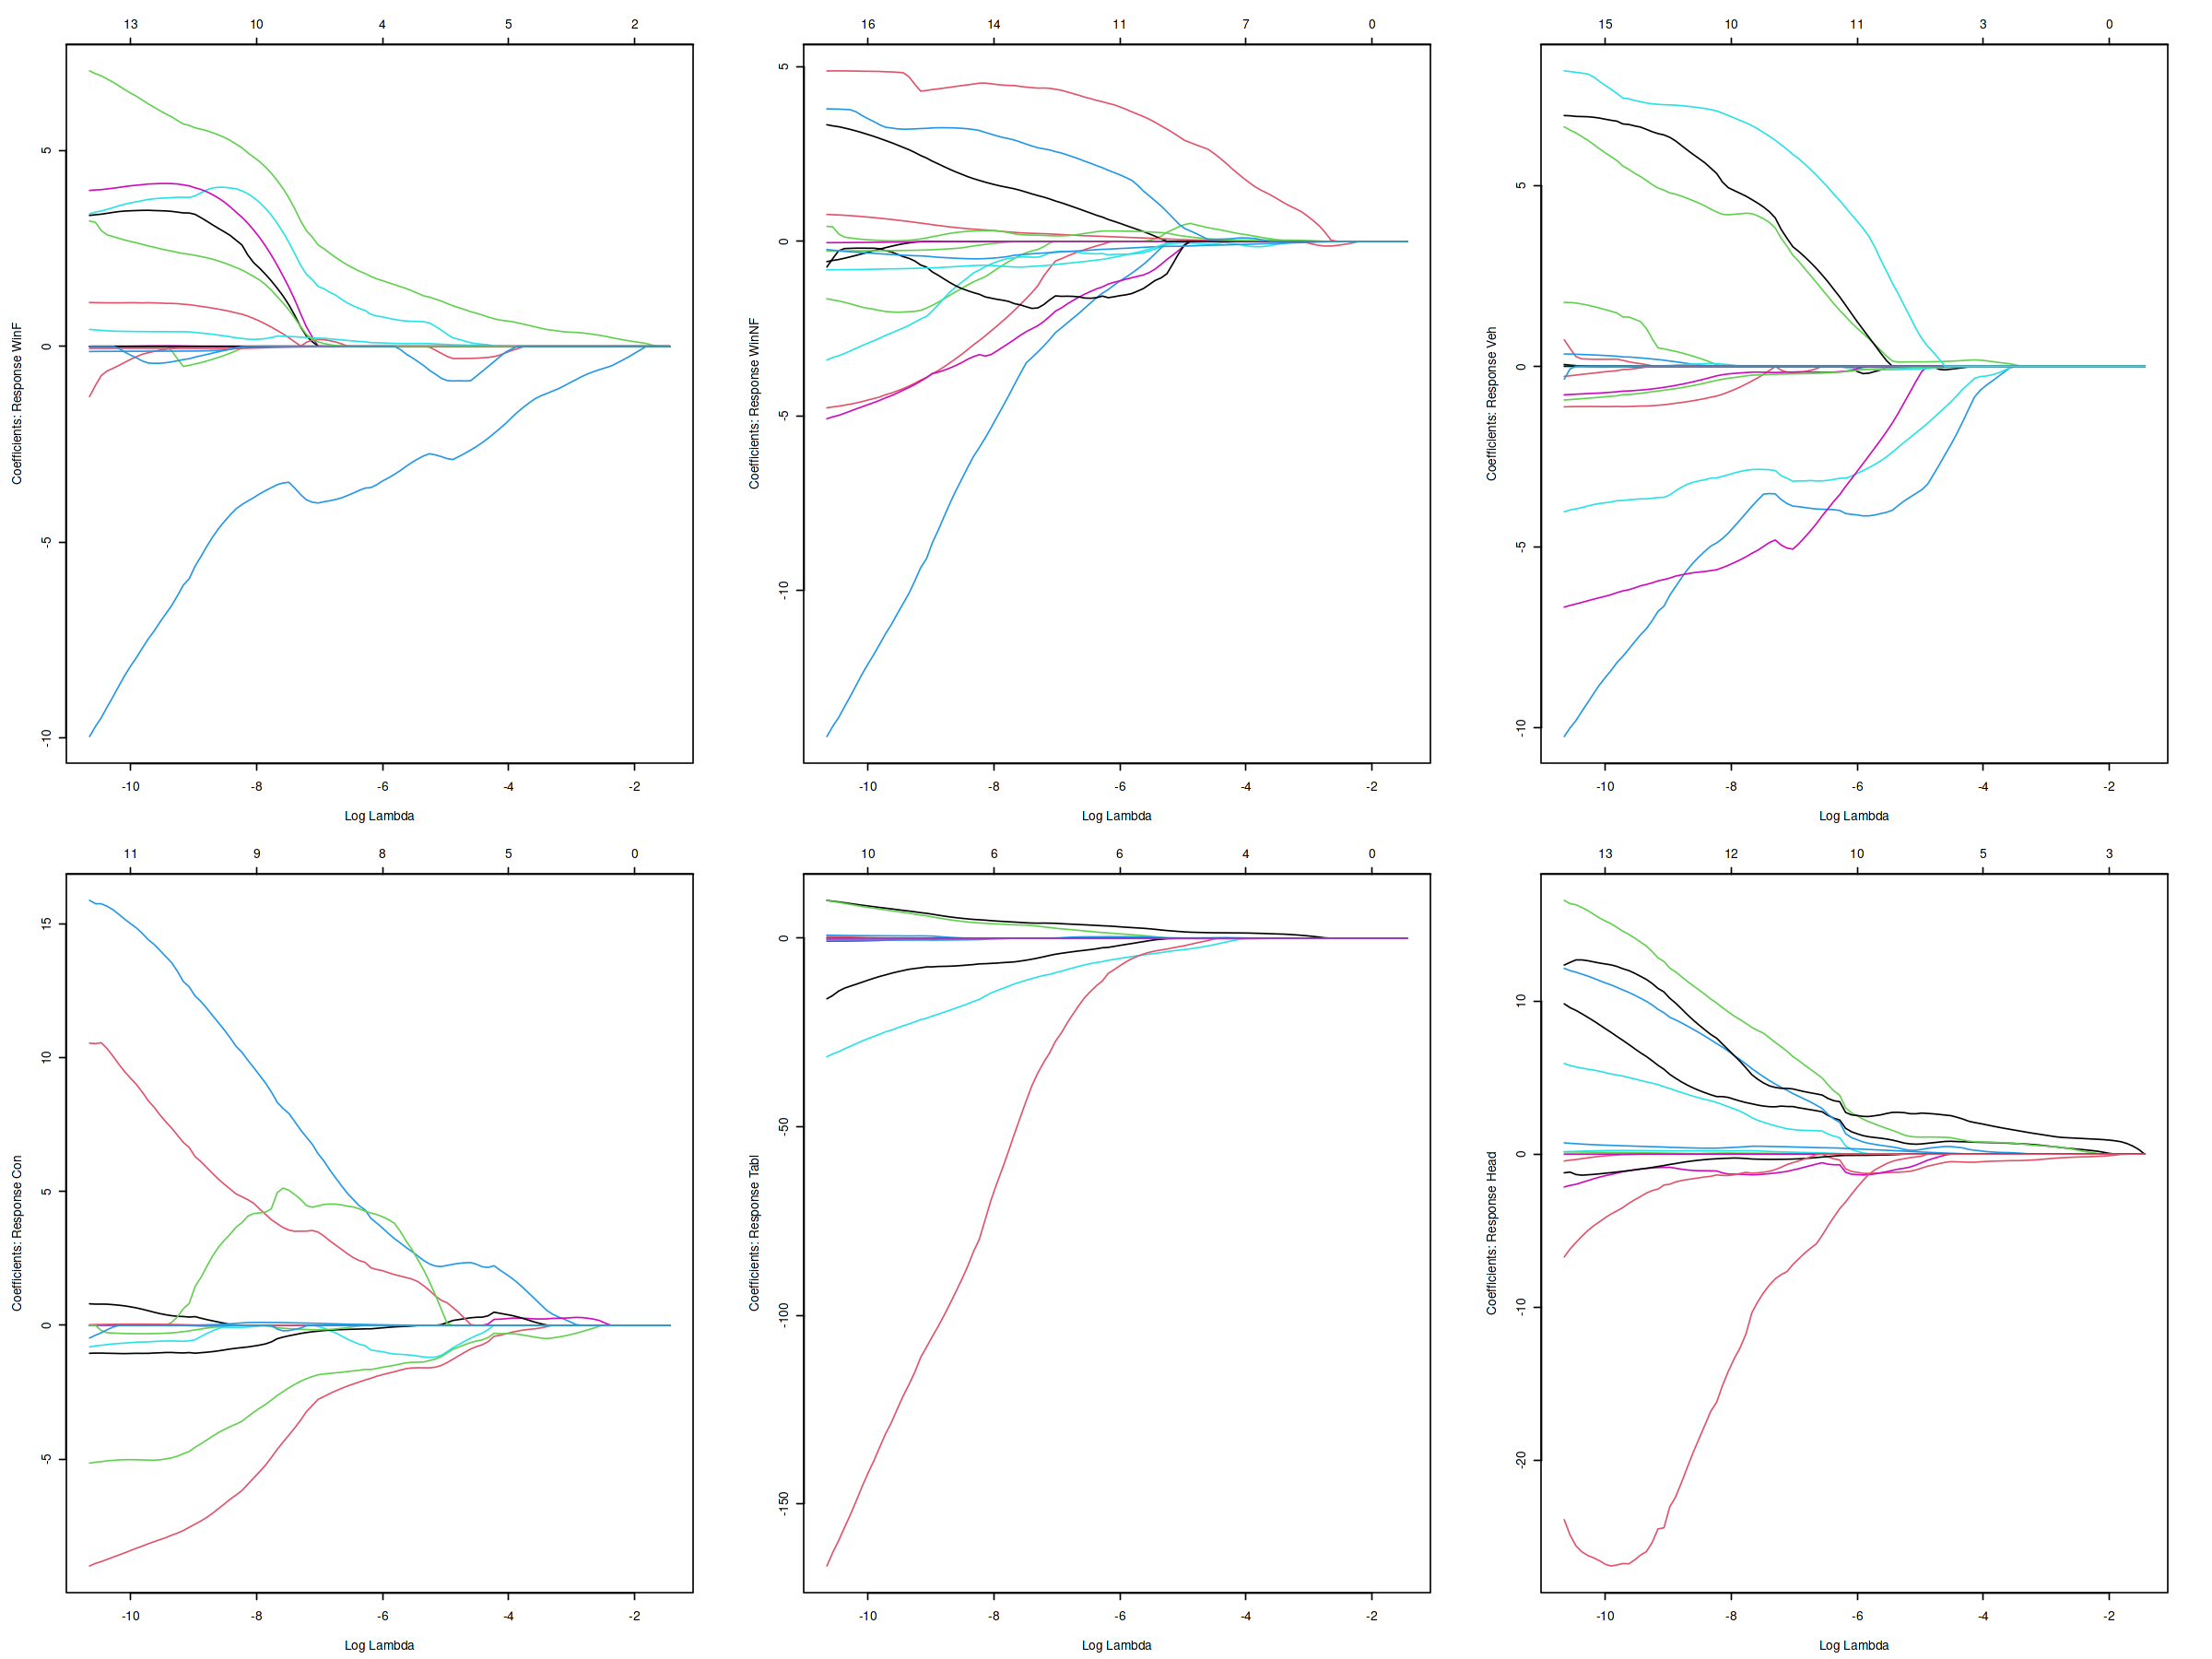

In [331]:
xfgl <- sparse.model.matrix(type~.*RI, data = fgl)[,-1]
gtype <- fgl$type
glassfit <- cv.glmnet(xfgl, gtype, family = "multinomial")
plot(glassfit) # CV error; across top avg # nonzero across classes
## plot the 6 sets of coefficient paths for each response class
par(mfrow = c(2, 3), mai = c(.6, .6, .4, .4)) ## note we can use xvar="lambda" to plot against log lambda
plot(glassfit$glm, xvar = "lambda")

In [332]:
## extract coefficients
B  <- coef(glassfit, select="min")
B # it's a list of coefficients, 1 matrix per glass type.
## combine into a matrix
B <- do.call(cbind, B)
## annoyingly, column names are dropped
colnames(B) <- levels(gtype) # add them back

$WinF
18 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept)  3.980510
RI           .       
Na           .       
Mg           0.533224
Al          -1.441856
Si           .       
K            .       
Ca           .       
Ba           .       
Fe           .       
RI:Na        .       
RI:Mg        .       
RI:Al        .       
RI:Si        .       
RI:K         .       
RI:Ca        .       
RI:Ba        .       
RI:Fe        .       

$WinNF
18 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) 13.587481905
RI           .          
Na           .          
Mg           0.088078056
Al           .          
Si          -0.138977202
K            .          
Ca           .          
Ba           .          
Fe           1.387452749
RI:Na        .          
RI:Mg       -0.066597235
RI:Al        .          
RI:Si        .          
RI:K         .          
RI:Ca        0.009805488
RI:Ba        0.034850971
RI:Fe        0.014290846

$Veh
18 

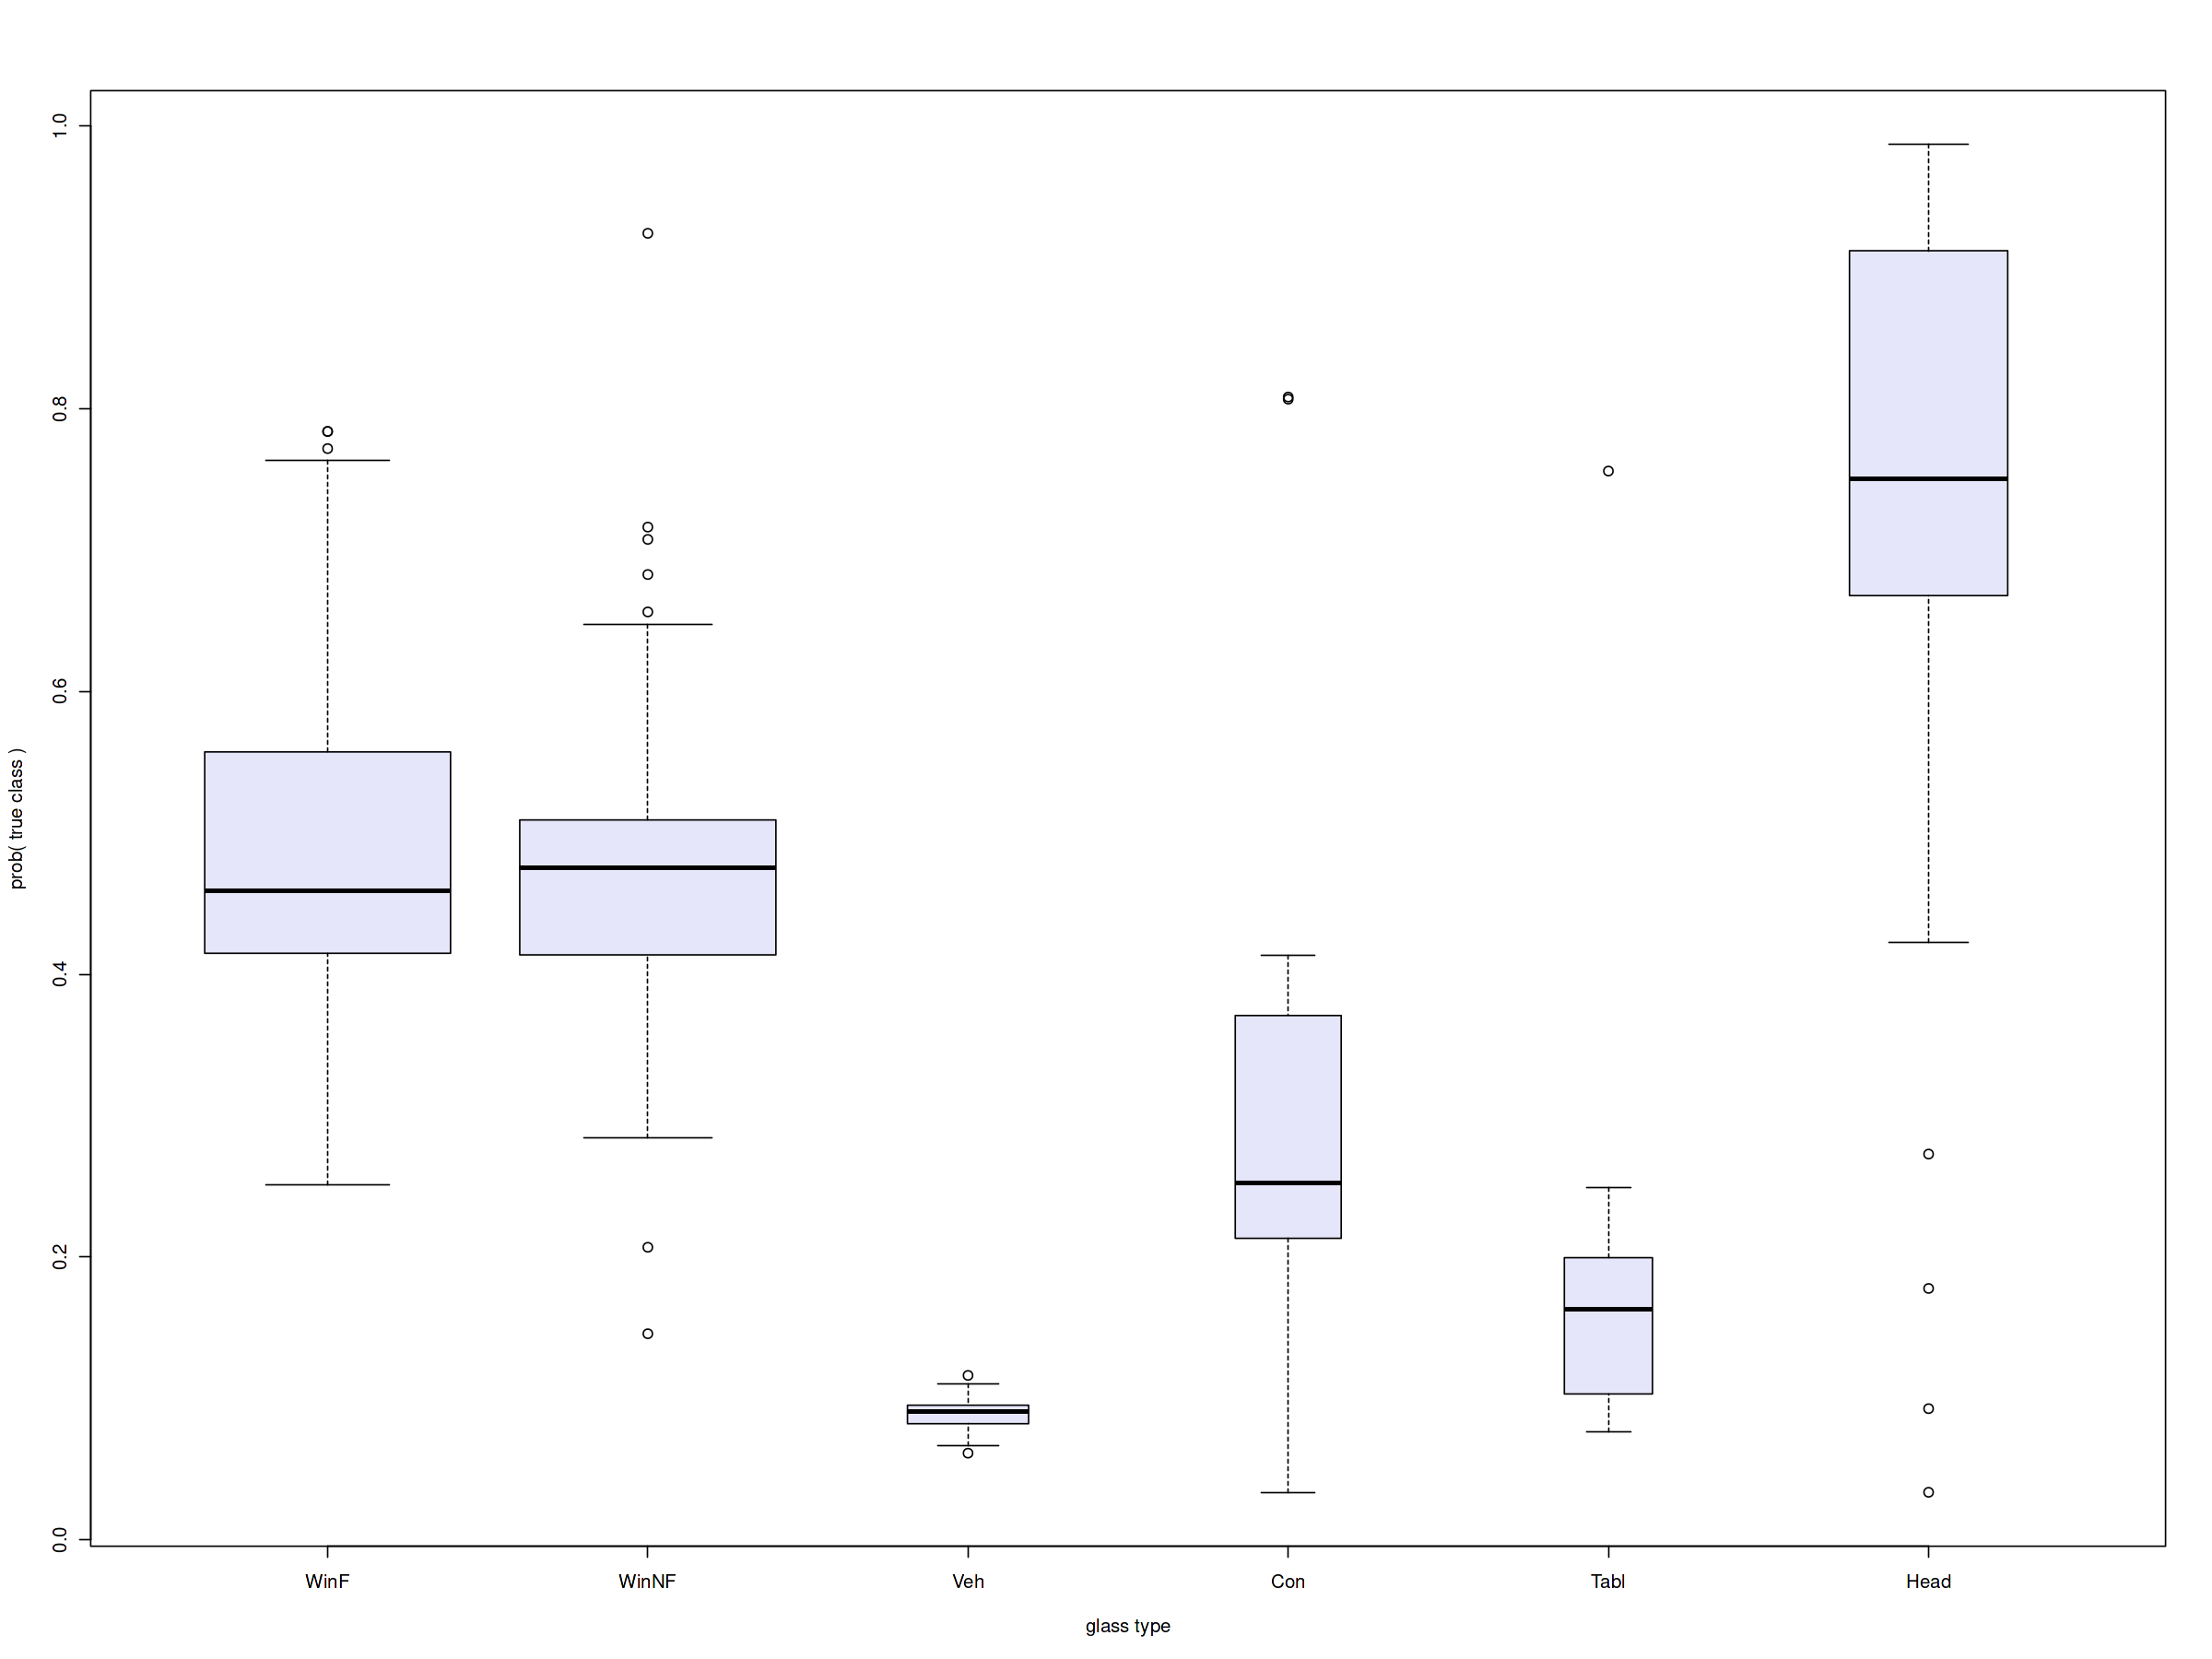

In [333]:
### fit plots: plot p_yi distribution for each true yi
# use predict to get in-sample probabilities
probfgl <- predict(glassfit, xfgl, type="response")
# for some reason glmnet gives back predictions as an nxKx1 array. 
# use drop() to make it an nxK matrix
probfgl <- drop(probfgl)
# get the probs for what actually happened
# note use of a matrix to index a matrix! 
# gives back the [i,j] entry of probfgl for each row of index matrix 
# so, here, that's the probability of true class for each observation
n <- nrow(xfgl)
trueclassprobs <- probfgl[cbind(1:n, gtype)] 
## plot true probs, with varwidth to have the box widths proportional to response proportion.
plot(trueclassprobs ~ gtype, col="lavender", varwidth=TRUE,
     xlab="glass type", ylab="prob( true class )")

# CREDIT

In [334]:
path2 = "https://raw.githubusercontent.com/TaddyLab/MBAcourse/master/examples/credit.csv"
credit = read.csv(path2)
head(credit)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,⋯,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,A11,6,A34,A43,1169,A65,A75,4,A93,⋯,4,A121,67,A143,A152,2,A173,1,A192,A201
2,1,A12,48,A32,A43,5951,A61,A73,2,A92,⋯,2,A121,22,A143,A152,1,A173,1,A191,A201
3,0,A14,12,A34,A46,2096,A61,A74,2,A93,⋯,3,A121,49,A143,A152,1,A172,2,A191,A201
4,0,A11,42,A32,A42,7882,A61,A74,2,A93,⋯,4,A122,45,A143,A153,1,A173,2,A191,A201
5,1,A11,24,A33,A40,4870,A61,A73,3,A93,⋯,4,A124,53,A143,A153,2,A173,2,A191,A201
6,0,A14,36,A32,A46,9055,A65,A73,2,A93,⋯,4,A124,35,A143,A153,1,A172,2,A192,A201


In [335]:
## re-level the credit history and checking account status
credit$history = factor(credit$history, levels=c("A30","A31","A32","A33","A34"))
levels(credit$history) = c("good","good","poor","poor","terrible")

## a few others
credit$foreign <- factor(credit$foreign, levels=c("A201","A202"), labels=c("foreign","german"))
credit$rent <- factor(credit$housing=="A151")
credit$purpose <- factor(credit$purpose, levels=c("A40","A41","A42","A43","A44","A45","A46","A47","A48","A49","A410"))
levels(credit$purpose) <- c("newcar","usedcar",rep("goods/repair",4),"edu",NA,"edu","biz","biz")

credit <- credit[,c("Default", "duration", "amount",
                    "installment", "age", "history",
                    "purpose", "foreign", "rent")]

In [336]:
head(credit)

,Default,duration,amount,installment,age,history,purpose,foreign,rent
,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,0,6,1169,4,67,terrible,goods/repair,foreign,FALSE
2,1,48,5951,2,22,poor,goods/repair,foreign,FALSE
3,0,12,2096,2,49,terrible,edu,foreign,FALSE
4,0,42,7882,2,45,poor,goods/repair,foreign,FALSE
5,1,24,4870,3,53,poor,newcar,foreign,FALSE
6,0,36,9055,2,35,poor,edu,foreign,FALSE


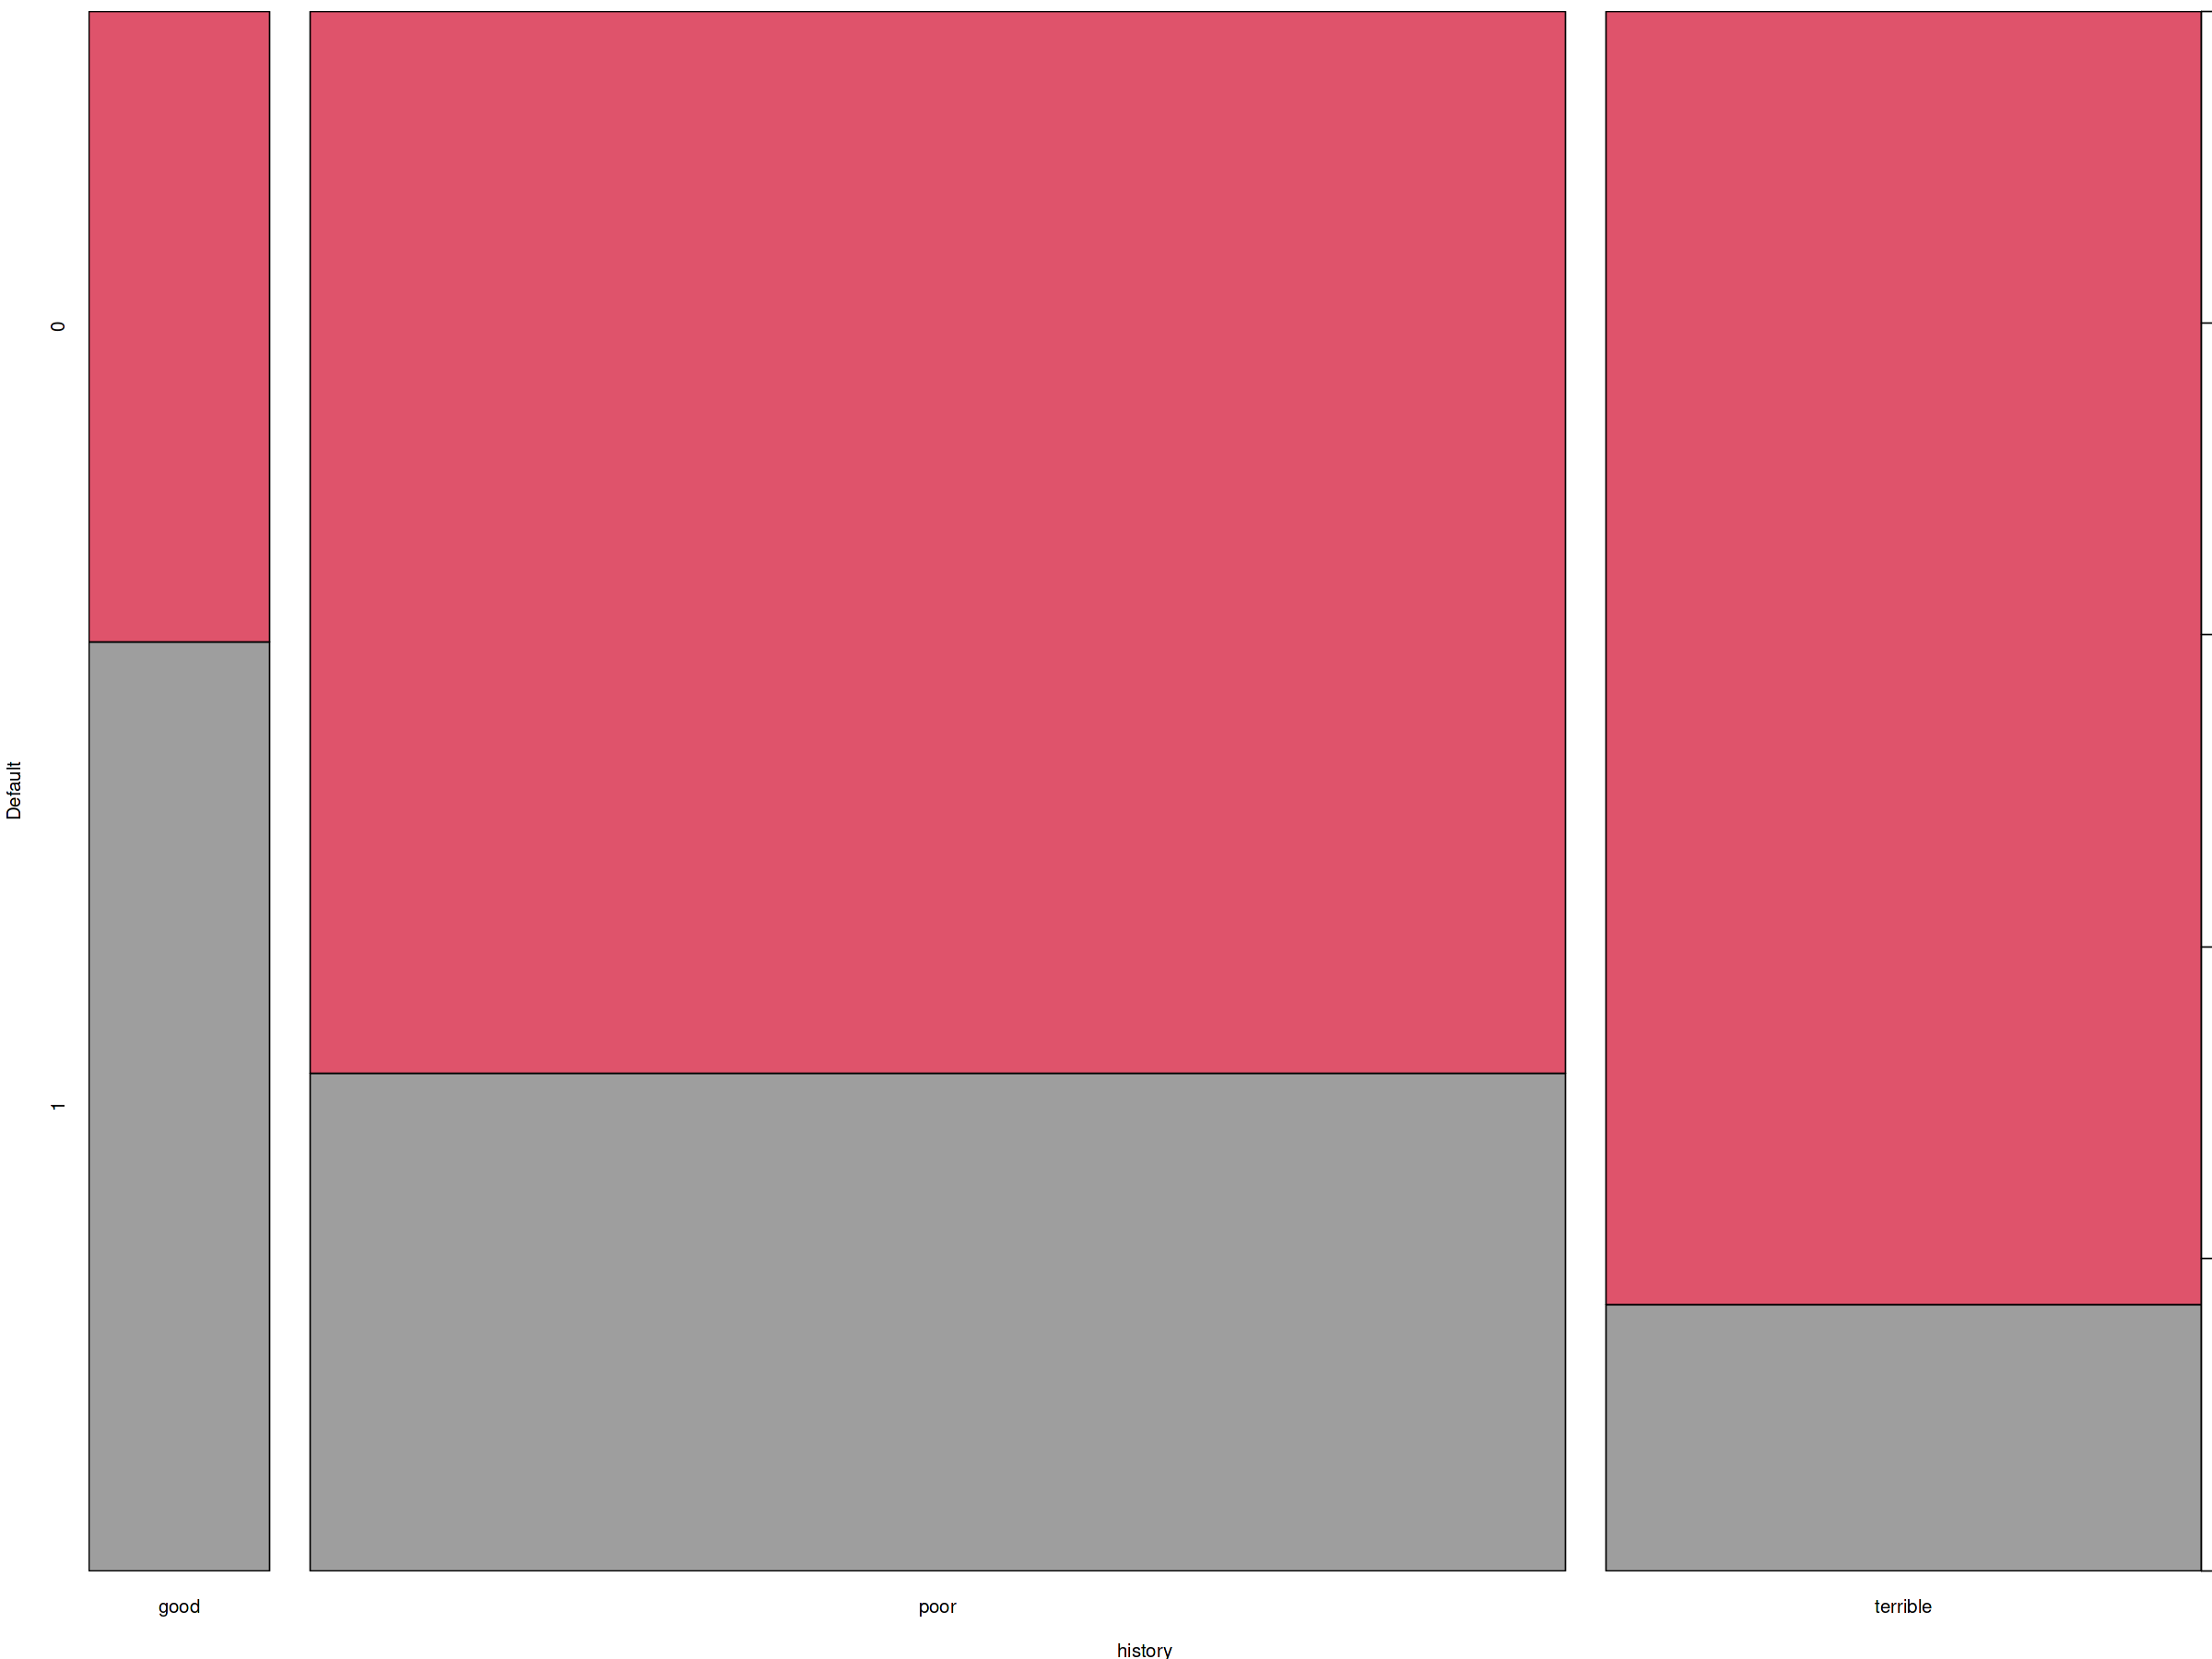

In [337]:
## plot a mosaic
par(mai = c(.8, .8, .1, .1))
plot(factor(Default) ~ history, data = credit, col=c(8,2), ylab="Default") ## surprise!
## the dangers of choice-based sampling!

> ## Beberapa bagian ini literally copas github

In [338]:
install.packages("gamlr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [339]:
## build a design matrix 
library(gamlr)
source("https://raw.githubusercontent.com/TaddyLab/MBAcourse/master/examples/naref.R")
credx <- sparse.model.matrix( Default ~ .^2, data=naref(credit))[,-1]
default <- credit$Default
credscore <- cv.gamlr(credx, default, family="binomial", verb=TRUE)

fold 1,2,3,4,5,done.


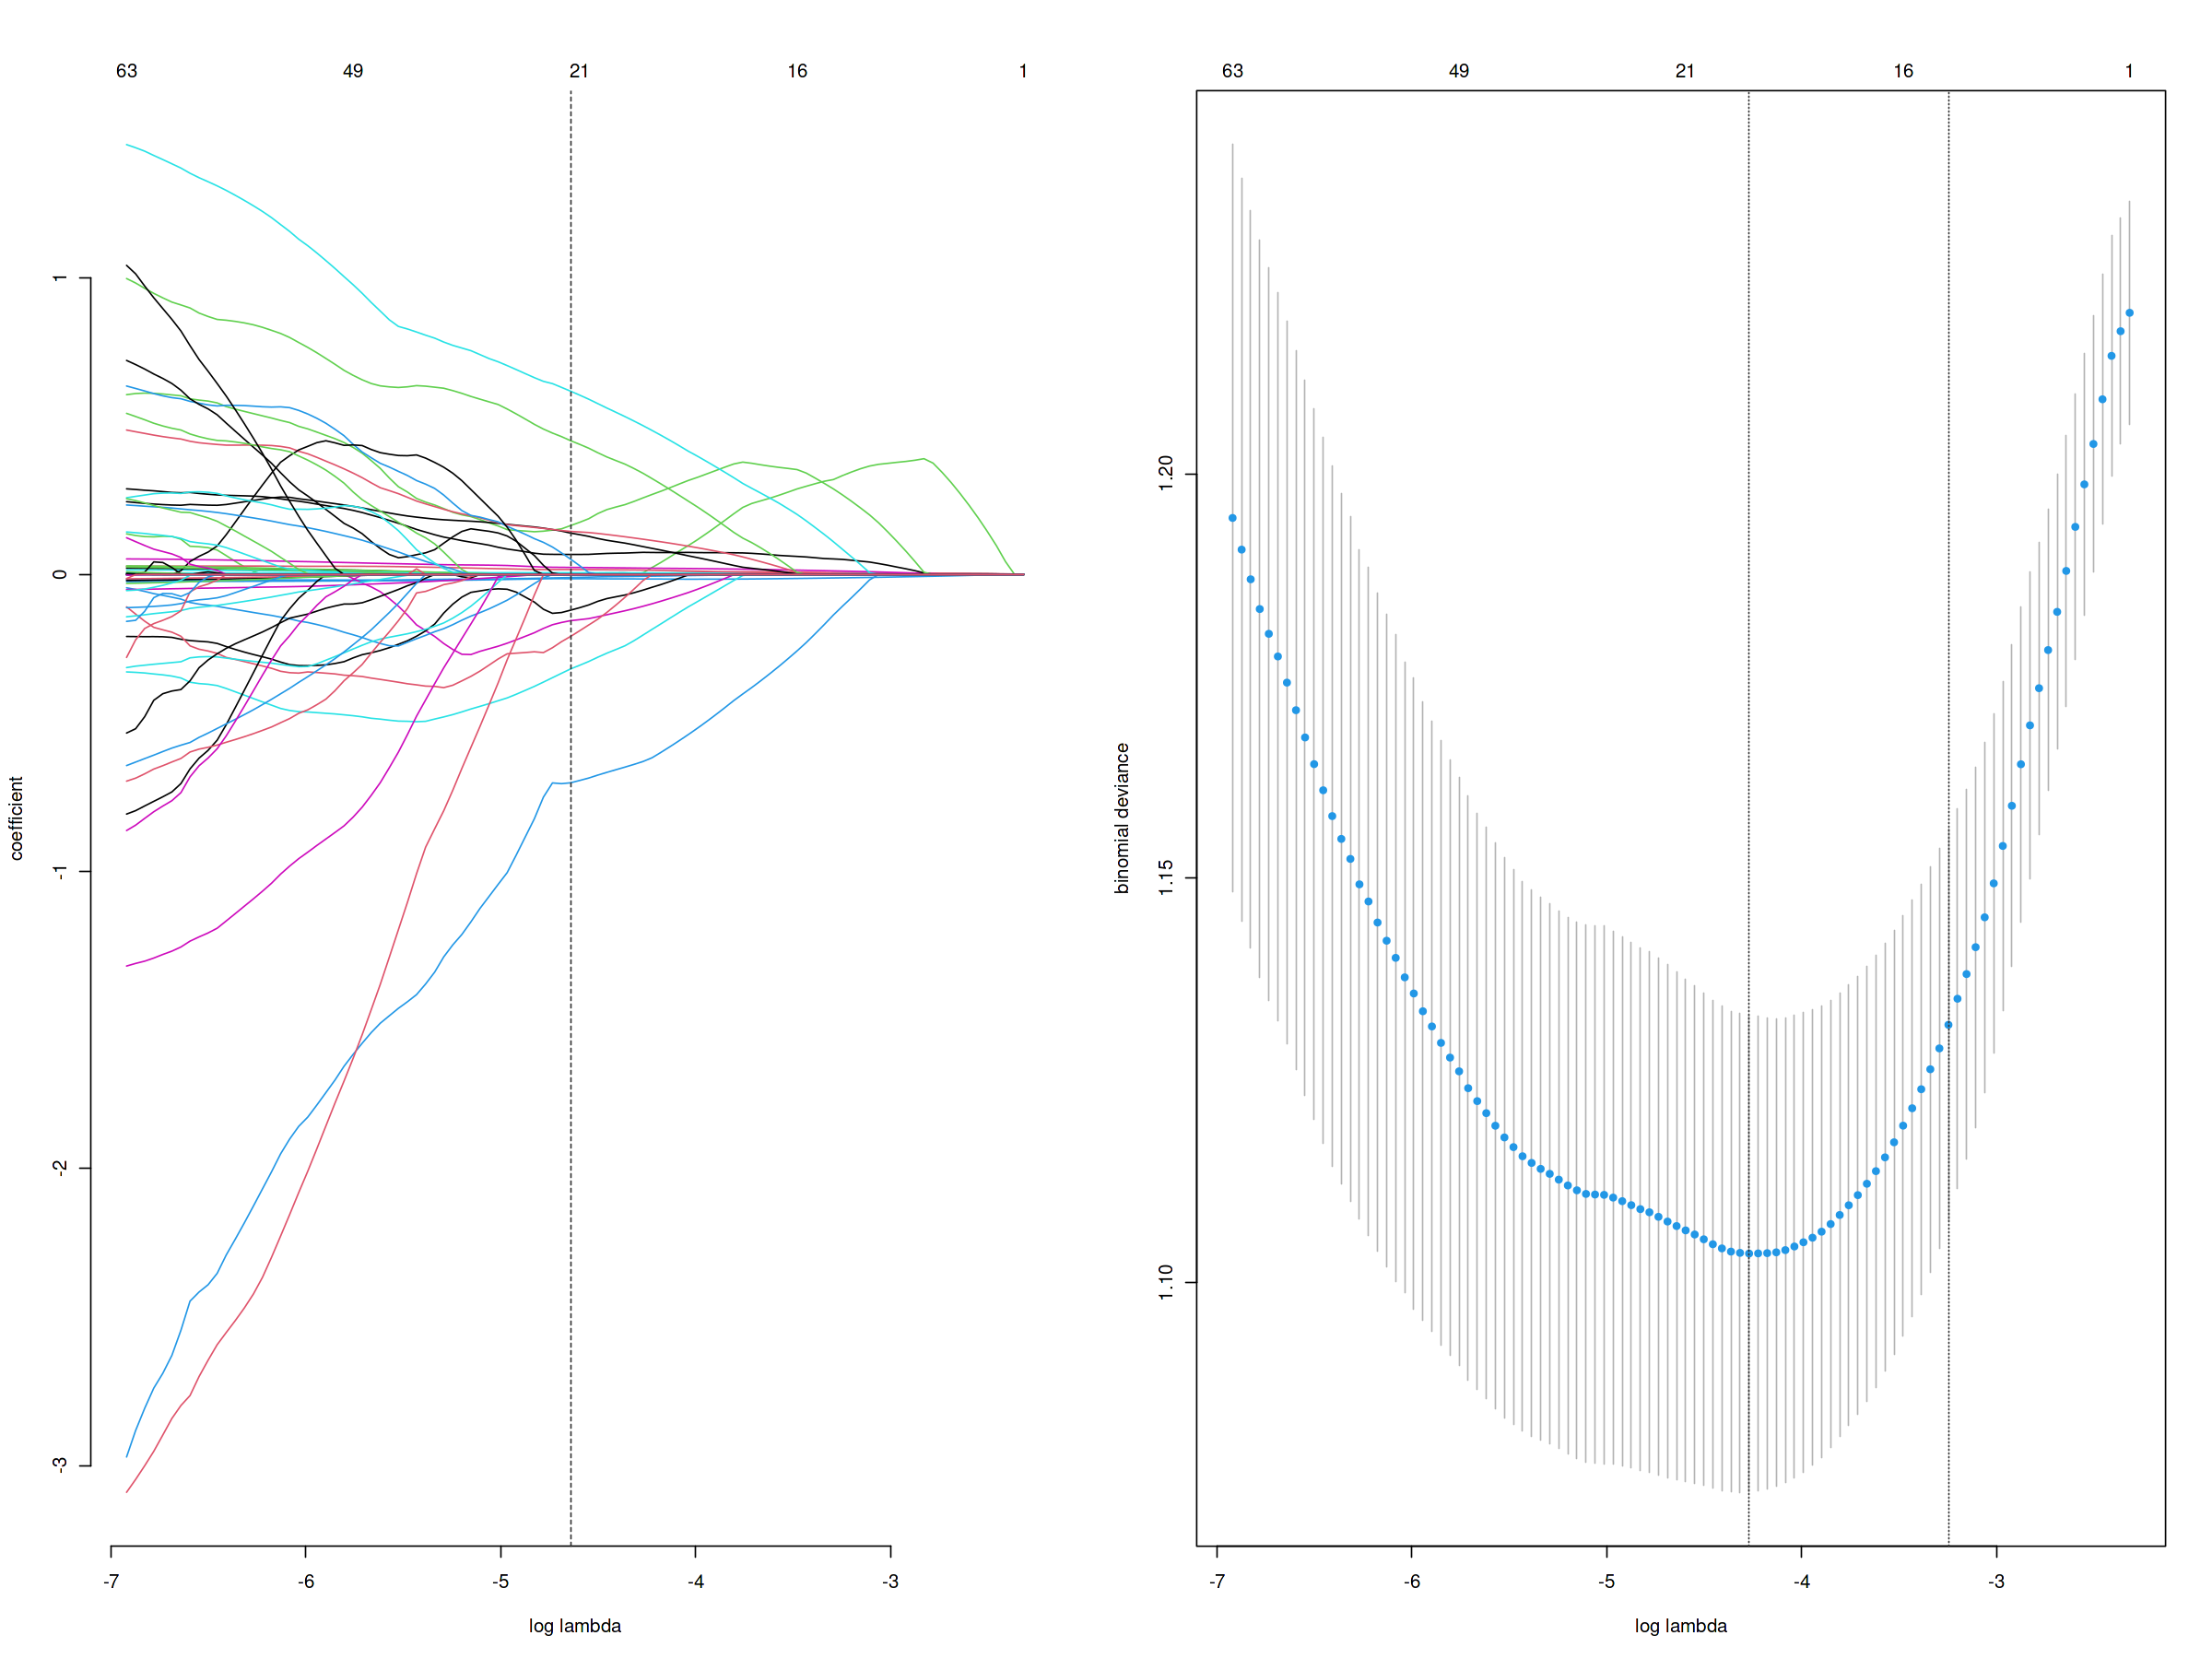

In [340]:
par(mfrow=c(1,2))
plot(credscore$gamlr)
plot(credscore)

In [341]:
sum(coef(credscore, s="min")!=0) # min
sum(coef(credscore$gamlr)!=0) # AICc

[1] 21

[1] 21

In [342]:
sum(coef(credscore)!=0) # 1se
sum(coef(credscore$gamlr, s=which.min(AIC(credscore$gamlr)))!=0) # AIC
sum(coef(credscore$gamlr, s=which.min(BIC(credscore$gamlr)))!=0) # BIC

[1] 12

[1] 21

[1] 19

In [343]:
# the OOS R^2
1 - credscore$cvm[credscore$seg.min]/credscore$cvm[1]

[1] 0.09532347

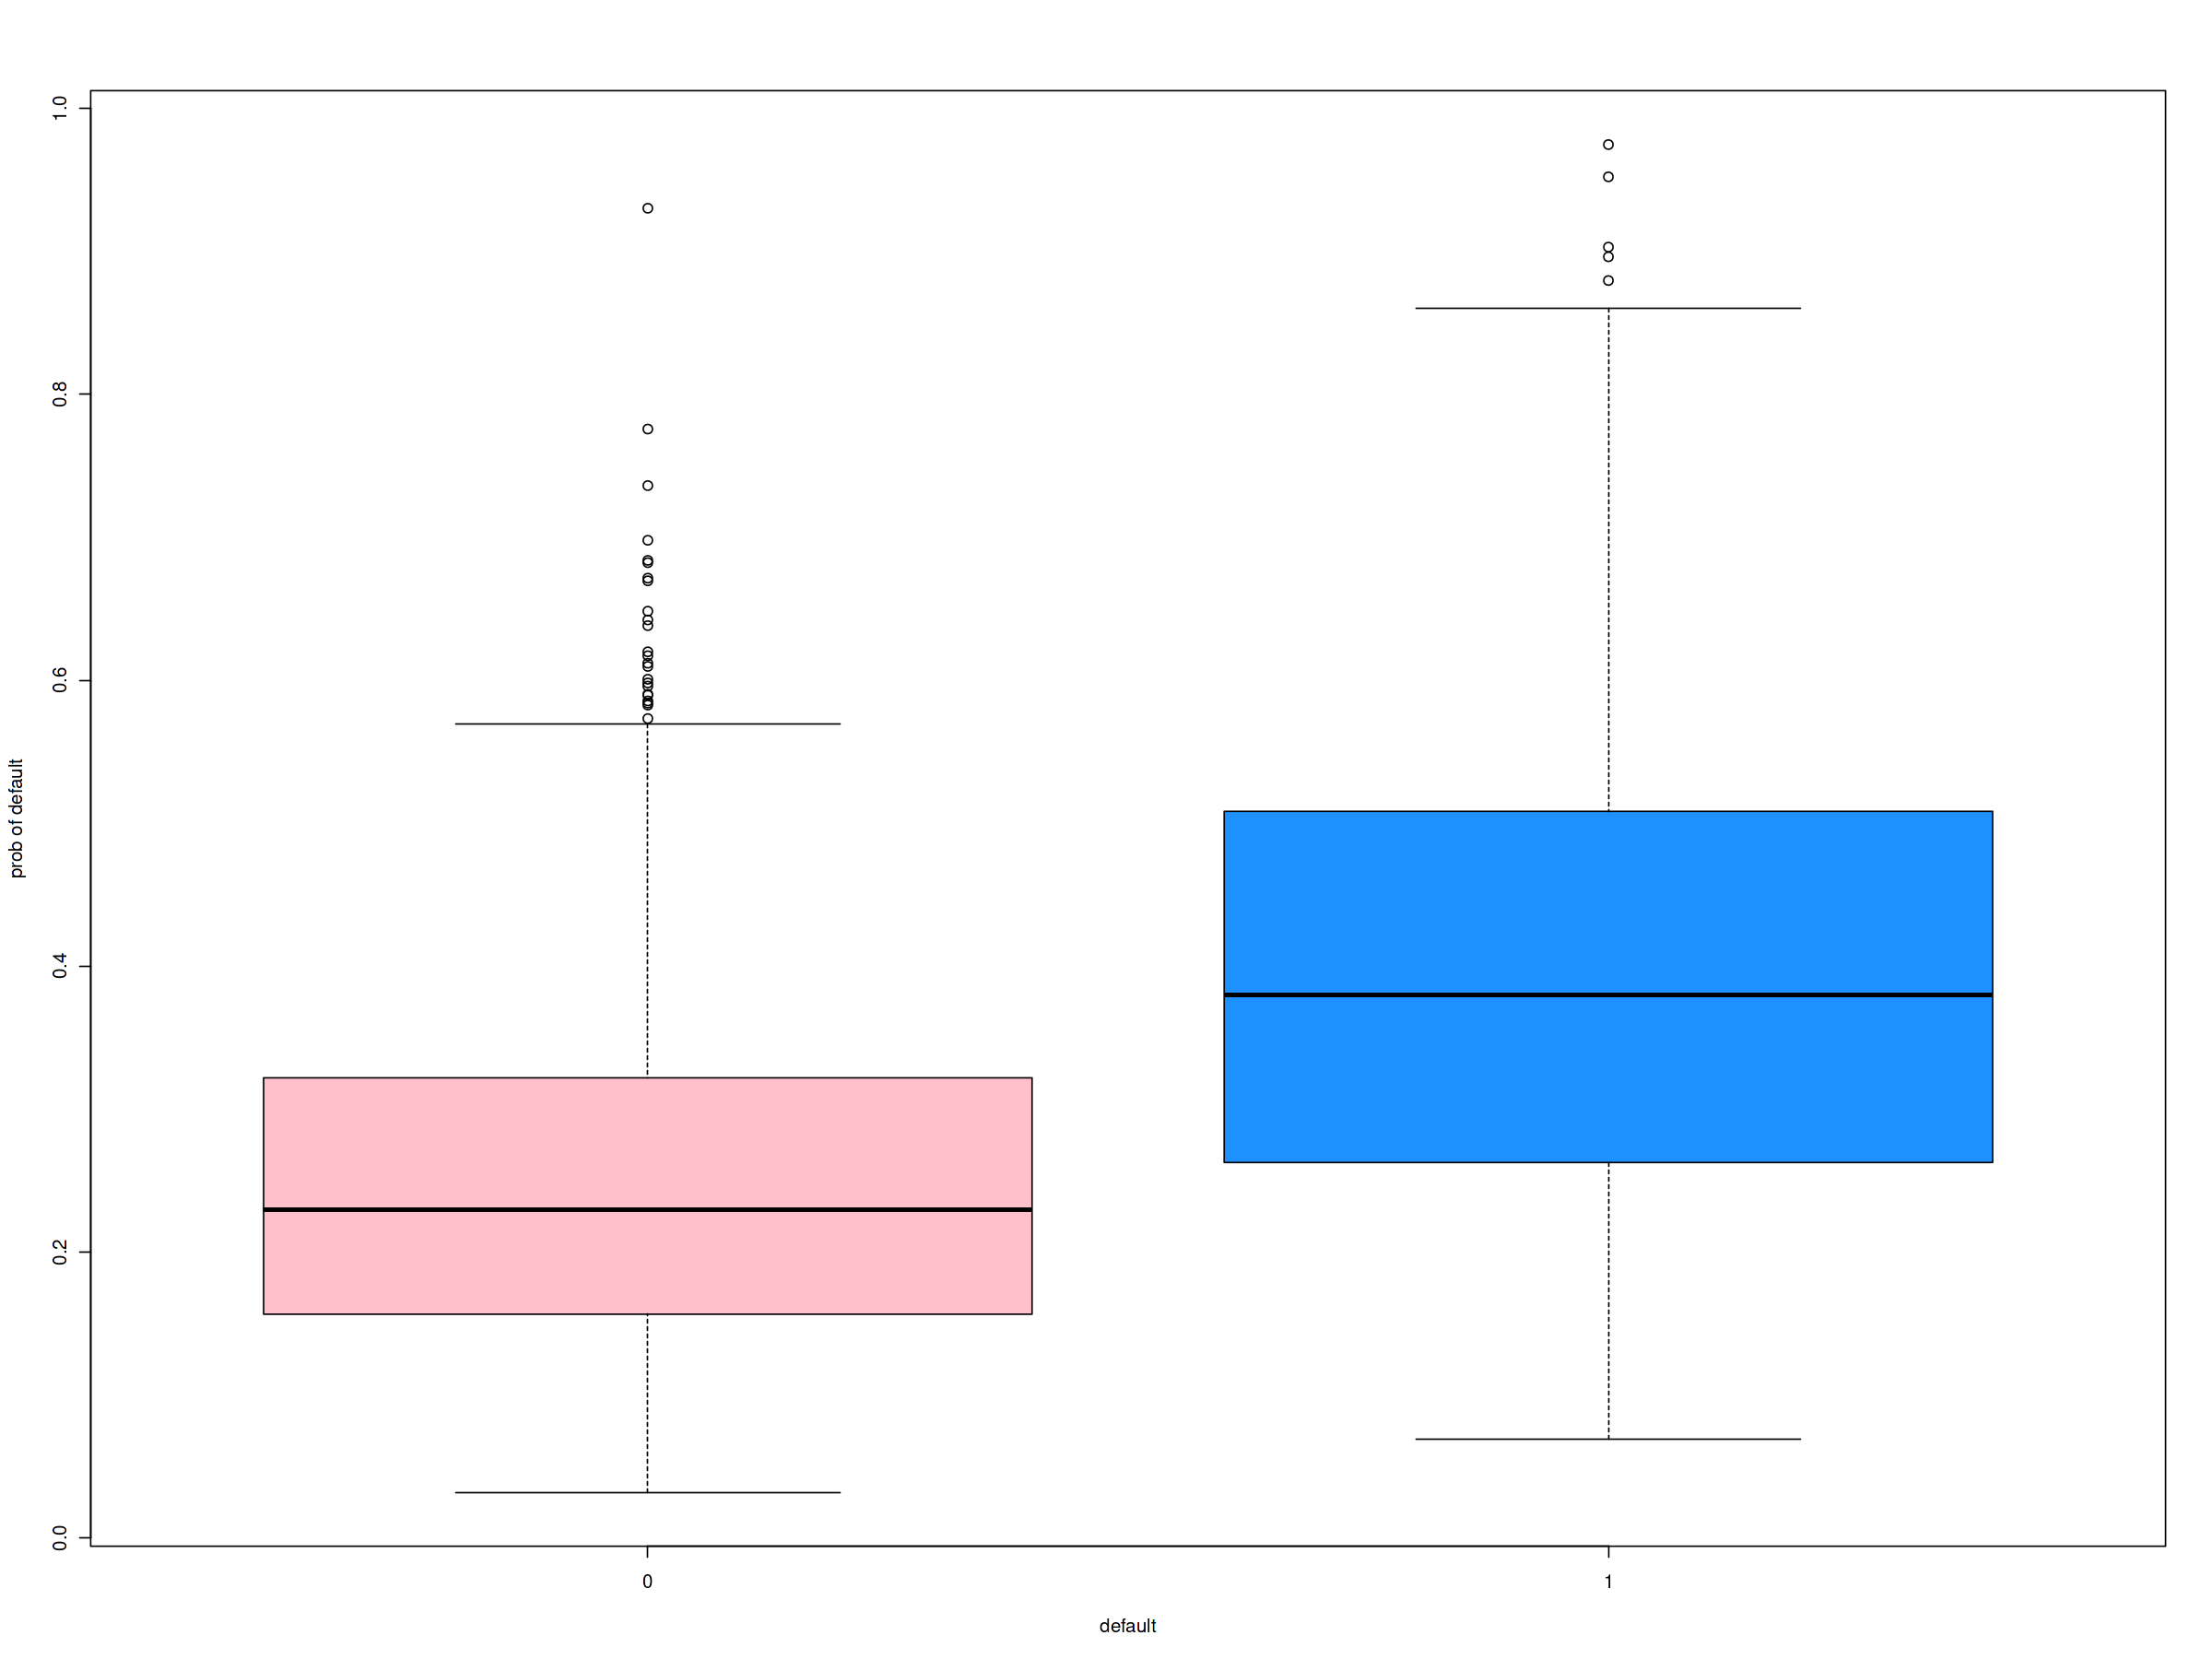

In [344]:
## What are the underlying default probabilities
## In sample probability estimates
pred <- predict(credscore$gamlr, credx, type="response")
pred <- drop(pred) # remove the sparse Matrix formatting
boxplot(pred ~ default, xlab="default", ylab="prob of default", col=c("pink","dodgerblue"))

In [345]:
## what are our misclassification rates?
rule <- 1/5 # move this around to see how these change

In [346]:
sum( (pred>rule)[default==0] )/sum(pred>rule) ## false positive rate
sum( (pred<rule)[default==1] )/sum(pred<rule) ## false negative rate

[1] 0.6059744

[1] 0.07744108

In [347]:
sum( (pred>rule)[default==1] )/sum(default==1) ## sensitivity
sum( (pred<rule)[default==0] )/sum(default==0) ## specificity

[1] 0.9233333

[1] 0.3914286

In [348]:
# OOS ROC curve
# refit the model using only 1/2 of data
test <- sample.int(1000,500)
credhalf <- gamlr(credx[-test,], default[-test], family="binomial")
predoos <- predict(credhalf, credx[test,], type="response")
defaultoos <- default[test]

In [349]:
## roc curve and fitted distributions
source("https://raw.githubusercontent.com/TaddyLab/MBAcourse/master/examples/roc.R")

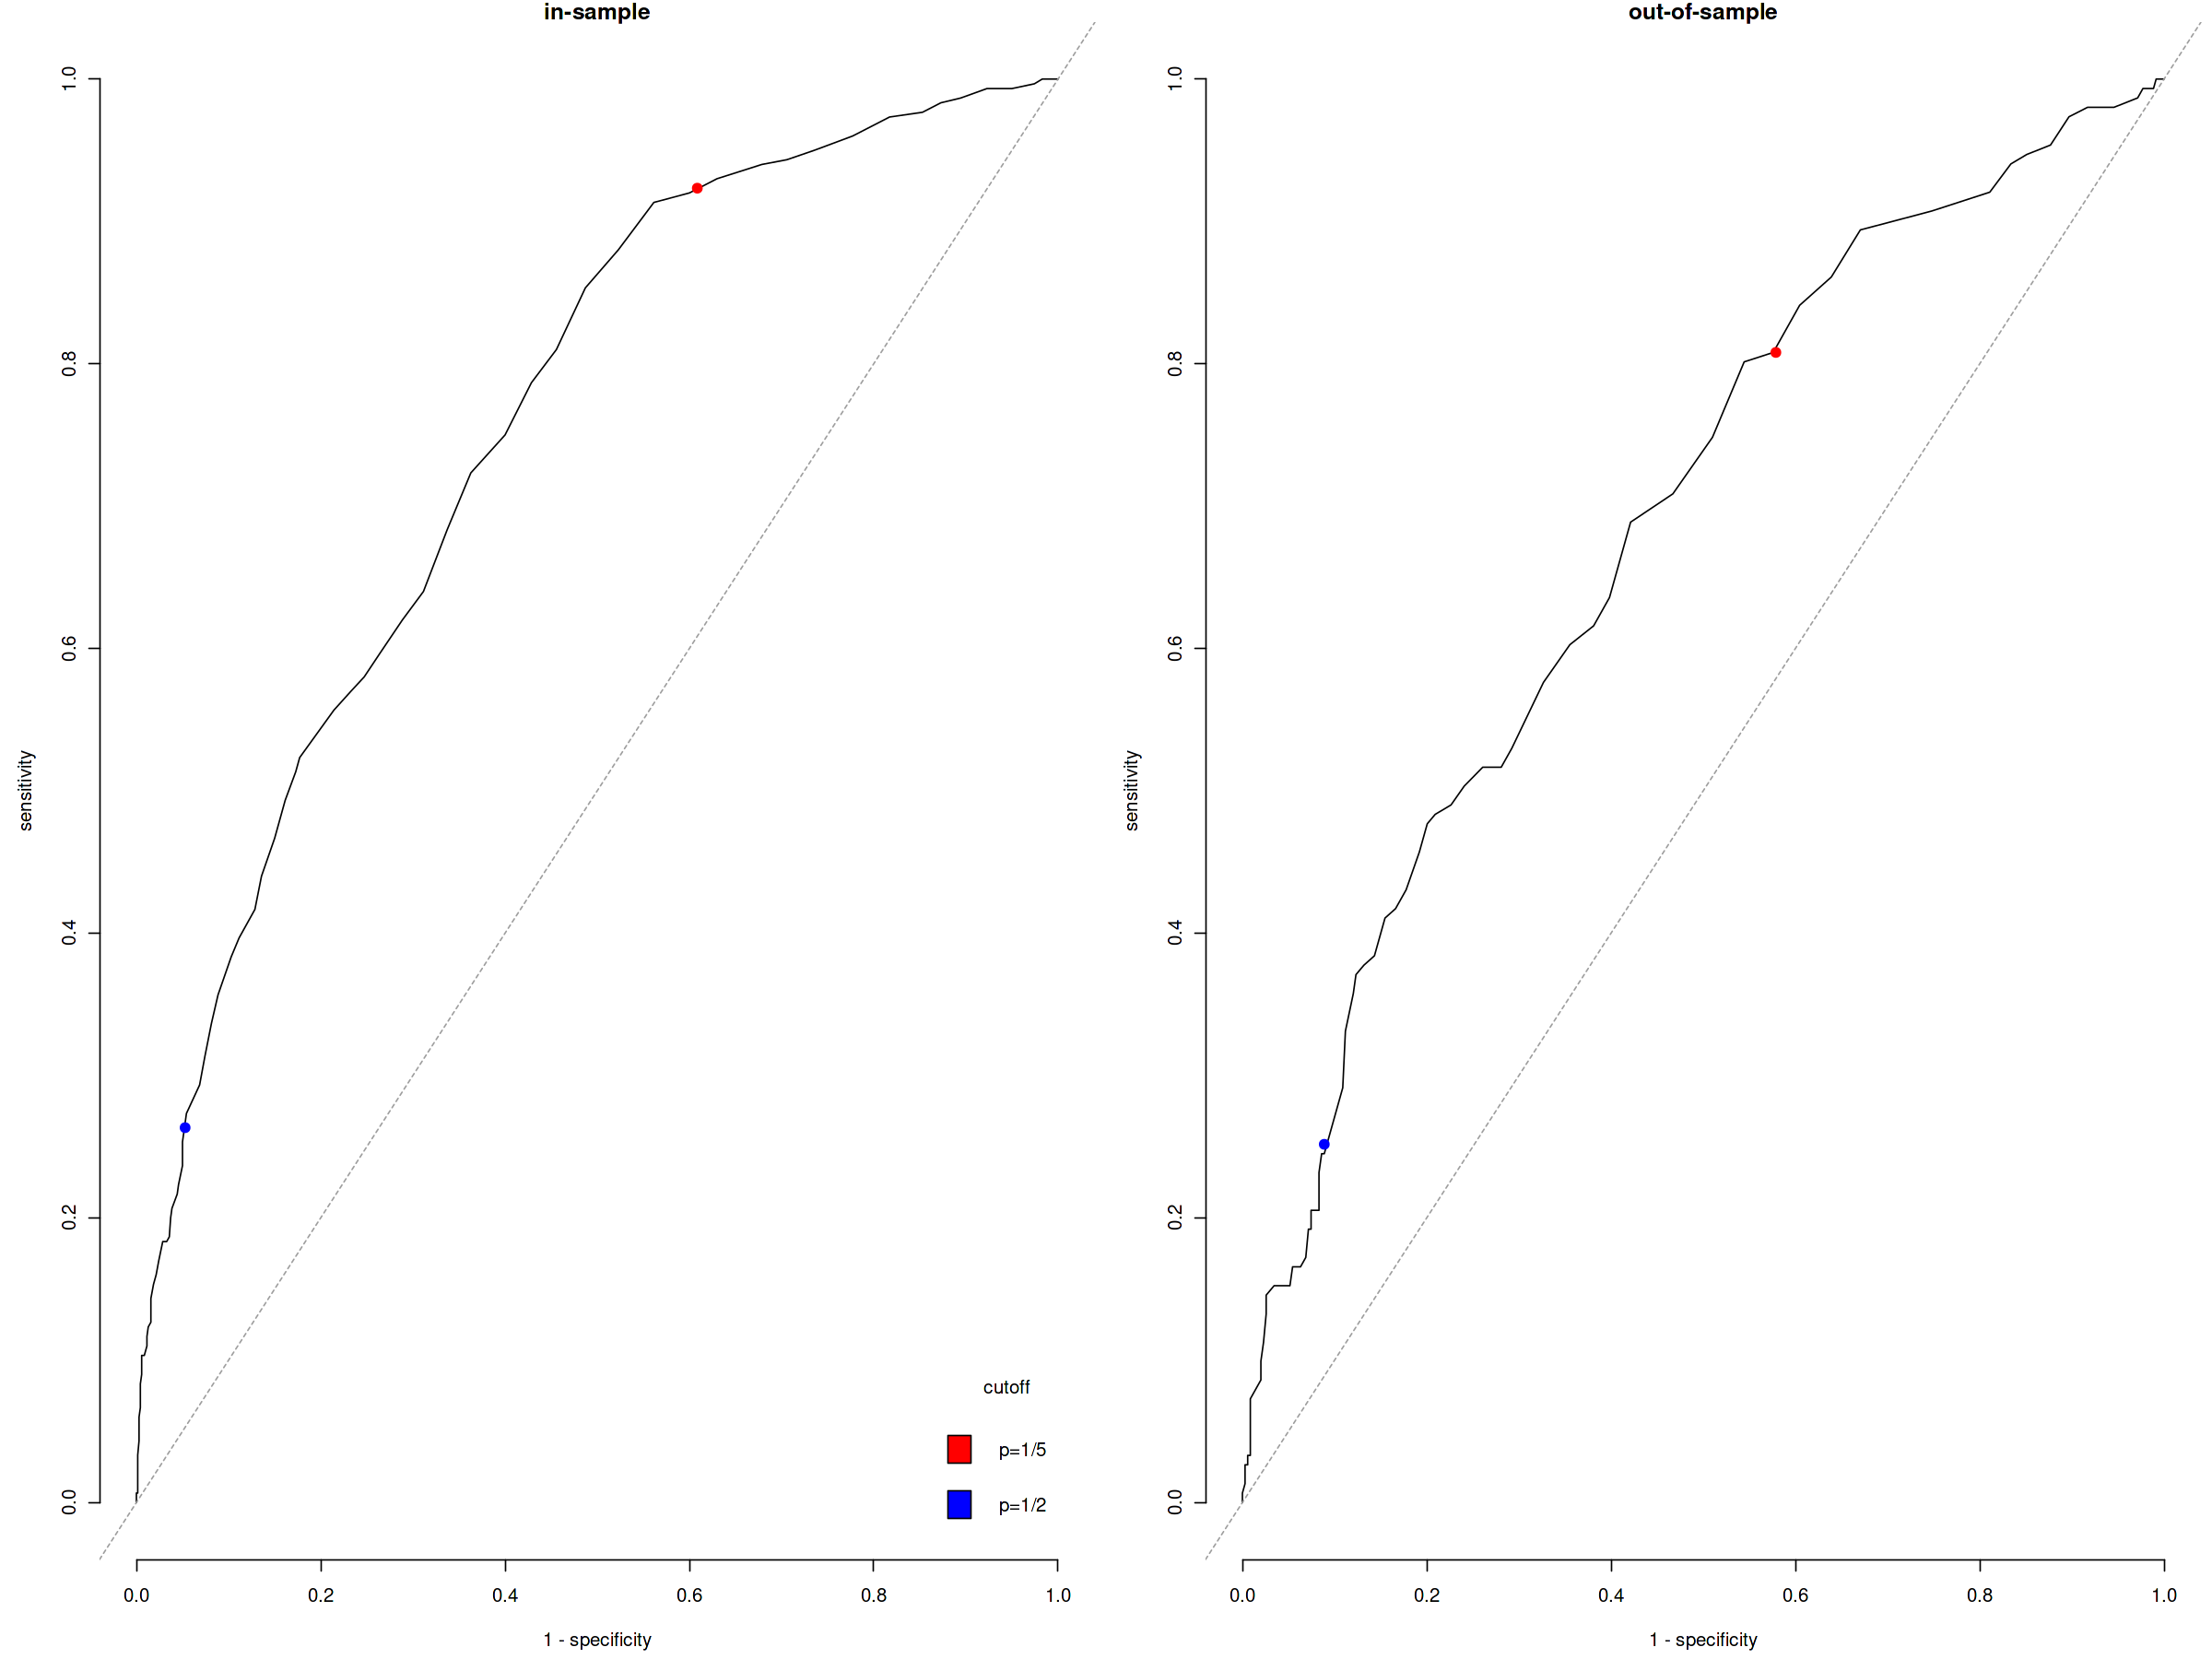

In [350]:
par(mai=c(.9,.9,.2,.1), mfrow=c(1,2))
roc(p=pred, y=default, bty="n", main="in-sample")
## our 1/5 rule cutoff
points(x= 1-mean((pred<.2)[default==0]), 
	y=mean((pred>.2)[default==1]), 
	cex=1.5, pch=20, col='red') 
## a standard `max prob' (p=.5) rule
points(x= 1-mean((pred<.5)[default==0]), 
	y=mean((pred>.5)[default==1]), 
	cex=1.5, pch=20, col='blue') 
legend("bottomright",fill=c("red","blue"),
	legend=c("p=1/5","p=1/2"),bty="n",title="cutoff")

roc(p=predoos, y=defaultoos, bty="n", main="out-of-sample")
## our 1/5 rule cutoff
points(x= 1-mean((predoos<.2)[defaultoos==0]), 
	y=mean((predoos>.2)[defaultoos==1]), 
	cex=1.5, pch=20, col='red') 
## a standard `max prob' (p=.5) rule
points(x= 1-mean((predoos<.5)[defaultoos==0]), 
	y=mean((predoos>.5)[defaultoos==1]), 
	cex=1.5, pch=20, col='blue')

> # Data Preparation

In [351]:
head(credit)

,Default,duration,amount,installment,age,history,purpose,foreign,rent
,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,0,6,1169,4,67,terrible,goods/repair,foreign,FALSE
2,1,48,5951,2,22,poor,goods/repair,foreign,FALSE
3,0,12,2096,2,49,terrible,edu,foreign,FALSE
4,0,42,7882,2,45,poor,goods/repair,foreign,FALSE
5,1,24,4870,3,53,poor,newcar,foreign,FALSE
6,0,36,9055,2,35,poor,edu,foreign,FALSE


In [352]:
summary(credit)

    Default       duration        amount       installment         age       
 Min.   :0.0   Min.   : 4.0   Min.   :  250   Min.   :1.000   Min.   :19.00  
 1st Qu.:0.0   1st Qu.:12.0   1st Qu.: 1366   1st Qu.:2.000   1st Qu.:27.00  
 Median :0.0   Median :18.0   Median : 2320   Median :3.000   Median :33.00  
 Mean   :0.3   Mean   :20.9   Mean   : 3271   Mean   :2.973   Mean   :35.55  
 3rd Qu.:1.0   3rd Qu.:24.0   3rd Qu.: 3972   3rd Qu.:4.000   3rd Qu.:42.00  
 Max.   :1.0   Max.   :72.0   Max.   :18424   Max.   :4.000   Max.   :75.00  
     history            purpose       foreign       rent    
 good    : 89   newcar      :234   foreign:963   FALSE:821  
 poor    :618   usedcar     :103   german : 37   TRUE :179  
 terrible:293   goods/repair:495                            
                edu         : 59                            
                biz         :109                            
                                                            

> ### Label Enconding

In [353]:
# History
encoded_data1 <- model.matrix(~credit$history + 0)
# encoded_data1

encoded_data2 <- model.matrix(~credit$purpose + 0)
# encoded_data2

encoded_data3 <- model.matrix(~credit$foreign + 0)[,2]
# encoded_data3

credit$rent <- model.matrix(~credit$rent + 0)[,2]
credit$rent

[1] 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
  [38] 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  [75] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 [112] 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [297] 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [334] 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 [371] 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [445] 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 [482] 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 [519] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 [593] 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 [630] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [667] 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 [704] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 [741] 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 [815] 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 [852] 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 [926] 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 [963] 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
[1000] 0

In [354]:
credit2 = data.frame(credit[, -c(6:8)], encoded_data1, encoded_data2, foreign = encoded_data3)
head(credit2)

,Default,duration,amount,installment,age,rent,credit.historygood,credit.historypoor,credit.historyterrible,credit.purposenewcar,credit.purposeusedcar,credit.purposegoods.repair,credit.purposeedu,credit.purposebiz,foreign
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,6,1169,4,67,0,0,0,1,0,0,1,0,0,0
2,1,48,5951,2,22,0,0,1,0,0,0,1,0,0,0
3,0,12,2096,2,49,0,0,0,1,0,0,0,1,0,0
4,0,42,7882,2,45,0,0,1,0,0,0,1,0,0,0
5,1,24,4870,3,53,0,0,1,0,1,0,0,0,0,0
6,0,36,9055,2,35,0,0,1,0,0,0,0,1,0,0


> # Split Data

In [355]:
# Biar Hasil Sama
set.seed(123)

# 70% train and 30% test
sampel2 = sample(2, nrow(credit2), replace = TRUE, prob = c(0.7, 0.3))
train2 = credit2[sampel2 == 1,]
test2 = credit2[sampel2 == 2,]
dim(train2); dim(test2)

[1] 705  15

[1] 295  15

> # KNN

In [356]:
# Execution of k-NN with k=1
k2_1 = knn(train2[,-1], test2[,-1],
         train2$rent, k = 1, prob = TRUE)

# Execution of k-NN with k=2
k2_2 = knn(train2[,-1], test2[,-1],
         train2$rent, k = 2, prob = TRUE)

# Execution of k-NN with k=3
k2_3 = knn(train2[,-1], test2[,-1],
         train2$rent, k = 3, prob = TRUE)

# Execution of k-NN with k=4
k2_4 = knn(train2[,-1], test2[,-1],
         train2$rent, k = 4, prob = TRUE)

# Execution of k-NN with k=5
k2_5 = knn(train2[,-1], test2[,-1],
         train2$rent, k = 5, prob = TRUE)

# Execution of k-NN with k=6
k2_6 = knn(train2[,-1], test2[,-1],
         train2$rent, k = 6, prob = TRUE)

# Execution of k-NN with k=7
k2_7 = knn(train2[,-1], test2[,-1],
         train2$rent, k = 7, prob = TRUE)

> ### Evaluasi

In [357]:
table(test2$Default)


  0   1 
202  93 

In [358]:
# k= 1
hasil1 = table(test2$Default, k2_1)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

   k2_1
      0   1
  0 163  39
  1  78  15


 Akurasi :  0.6033898 %
 Sensitivity :  0.8069307 %
 Specivity :  0.1612903 %

In [359]:
# k = 2
hasil1 = table(test2$Default, k2_2)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

   k2_2
      0   1
  0 168  34
  1  78  15


 Akurasi :  0.620339 %
 Sensitivity :  0.8316832 %
 Specivity :  0.1612903 %

In [360]:
# k = 3
hasil1 = table(test2$Default, k2_3)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

   k2_3
      0   1
  0 187  15
  1  86   7


 Akurasi :  0.6576271 %
 Sensitivity :  0.9257426 %
 Specivity :  0.07526882 %

In [361]:
# k = 4
hasil1 = table(test2$Default, k2_4)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

   k2_4
      0   1
  0 184  18
  1  88   5


 Akurasi :  0.640678 %
 Sensitivity :  0.9108911 %
 Specivity :  0.05376344 %

In [362]:
# k = 5
hasil1 = table(test2$Default, k2_5)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

   k2_5
      0   1
  0 192  10
  1  93   0


 Akurasi :  0.6508475 %
 Sensitivity :  0.950495 %
 Specivity :  0 %

In [363]:
# k = 6
hasil1 = table(test2$Default, k2_6)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

   k2_6
      0   1
  0 188  14
  1  93   0


 Akurasi :  0.6372881 %
 Sensitivity :  0.9306931 %
 Specivity :  0 %

In [364]:
# k = 7
hasil1 = table(test2$Default, k2_7)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

   k2_7
      0   1
  0 194   8
  1  93   0


 Akurasi :  0.6576271 %
 Sensitivity :  0.960396 %
 Specivity :  0 %

> # Regresi Logistik (Versi Oknum coba2 gajelas:])

In [365]:
head(credit2)

,Default,duration,amount,installment,age,rent,credit.historygood,credit.historypoor,credit.historyterrible,credit.purposenewcar,credit.purposeusedcar,credit.purposegoods.repair,credit.purposeedu,credit.purposebiz,foreign
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,6,1169,4,67,0,0,0,1,0,0,1,0,0,0
2,1,48,5951,2,22,0,0,1,0,0,0,1,0,0,0
3,0,12,2096,2,49,0,0,0,1,0,0,0,1,0,0
4,0,42,7882,2,45,0,0,1,0,0,0,1,0,0,0
5,1,24,4870,3,53,0,0,1,0,1,0,0,0,0,0
6,0,36,9055,2,35,0,0,1,0,0,0,0,1,0,0


> ### Modelling & Variabel Selection

In [366]:
mod1 = glm(Default~., family = binomial(link = 'logit'), data = train2)
summary(mod1)


Call:
glm(formula = Default ~ ., family = binomial(link = "logit"), 
    data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2482  -0.8088  -0.5747   1.0163   2.2294  

Coefficients: (2 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2.690e+00  5.668e-01  -4.746 2.08e-06 ***
duration                    2.029e-02  9.722e-03   2.087  0.03691 *  
amount                      9.303e-05  4.218e-05   2.205  0.02742 *  
installment                 2.370e-01  9.122e-02   2.598  0.00937 ** 
age                        -1.706e-02  8.674e-03  -1.966  0.04927 *  
rent                        3.617e-01  2.343e-01   1.544  0.12267    
credit.historygood          1.853e+00  3.338e-01   5.552 2.83e-08 ***
credit.historypoor          7.021e-01  2.262e-01   3.103  0.00191 ** 
credit.historyterrible             NA         NA      NA       NA    
credit.purposenewcar        8.408e-01  3.

> BUANG PURPOSED

In [367]:
mod2 = glm(Default~., family = binomial(link = 'logit'), data = train2[, -c(10:14)])
summary(mod2)


Call:
glm(formula = Default ~ ., family = binomial(link = "logit"), 
    data = train2[, -c(10:14)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8723  -0.8364  -0.6274   1.0932   2.1568  

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.376e+00  4.825e-01  -4.924 8.49e-07 ***
duration                1.673e-02  9.506e-03   1.760  0.07840 .  
amount                  7.865e-05  4.103e-05   1.917  0.05527 .  
installment             2.313e-01  8.878e-02   2.605  0.00918 ** 
age                    -1.503e-02  8.407e-03  -1.787  0.07389 .  
rent                    3.458e-01  2.293e-01   1.508  0.13159    
credit.historygood      1.794e+00  3.226e-01   5.561 2.68e-08 ***
credit.historypoor      7.098e-01  2.226e-01   3.189  0.00143 ** 
credit.historyterrible         NA         NA      NA       NA    
foreign                -1.053e+00  7.522e-01  -1.399  0.16174    
--

> BUANG FOREIGN

In [368]:
mod3 = glm(Default~. -foreign, family = binomial(link = 'logit'), data = train2[, -c(10:14)])
summary(mod3)


Call:
glm(formula = Default ~ . - foreign, family = binomial(link = "logit"), 
    data = train2[, -c(10:14)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8926  -0.8261  -0.6244   1.0934   2.1740  

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.462e+00  4.806e-01  -5.123 3.01e-07 ***
duration                1.826e-02  9.481e-03   1.926   0.0542 .  
amount                  7.887e-05  4.110e-05   1.919   0.0550 .  
installment             2.388e-01  8.869e-02   2.692   0.0071 ** 
age                    -1.524e-02  8.426e-03  -1.809   0.0705 .  
rent                    3.471e-01  2.284e-01   1.520   0.1285    
credit.historygood      1.829e+00  3.223e-01   5.673 1.41e-08 ***
credit.historypoor      7.245e-01  2.220e-01   3.263   0.0011 ** 
credit.historyterrible         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0

> BUANG RENT

In [369]:
mod4 = glm(Default~.-rent-foreign, family = binomial(link = 'logit'), data = train2[, -c(10:14)])
summary(mod4)


Call:
glm(formula = Default ~ . - rent - foreign, family = binomial(link = "logit"), 
    data = train2[, -c(10:14)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9067  -0.8295  -0.6350   1.0997   2.2555  

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.276e+00  4.634e-01  -4.911 9.06e-07 ***
duration                1.721e-02  9.421e-03   1.827 0.067703 .  
amount                  7.896e-05  4.093e-05   1.929 0.053694 .  
installment             2.313e-01  8.837e-02   2.617 0.008863 ** 
age                    -1.791e-02  8.265e-03  -2.167 0.030210 *  
credit.historygood      1.849e+00  3.214e-01   5.753 8.77e-09 ***
credit.historypoor      7.473e-01  2.213e-01   3.377 0.000733 ***
credit.historyterrible         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken t

> BUANG DURATION

In [370]:
mod5 = glm(Default~. -duration-rent-foreign, family = binomial(link = 'logit'), data = train2[, -c(10:14)])
summary(mod5)


Call:
glm(formula = Default ~ . - duration - rent - foreign, family = binomial(link = "logit"), 
    data = train2[, -c(10:14)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9205  -0.8409  -0.6406   1.0586   2.1939  

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.182e+00  4.586e-01  -4.757 1.96e-06 ***
amount                  1.272e-04  3.106e-05   4.096 4.20e-05 ***
installment             2.805e-01  8.399e-02   3.340 0.000838 ***
age                    -1.913e-02  8.214e-03  -2.329 0.019880 *  
credit.historygood      1.872e+00  3.204e-01   5.842 5.15e-09 ***
credit.historypoor      7.553e-01  2.209e-01   3.419 0.000627 ***
credit.historyterrible         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 853.56  on 704  degrees of 

> DAH SIGNIFIKAN SEMUA

## EVALUASI

In [371]:
table(test2$Default)


  0   1 
202  93 

In [372]:
# model 1
prob = predict(mod1, type = "response", newdata = test2)
prediksi = factor(ifelse(prob > 0.5, 1, 0))
hasil1 = table(test2$Default, prediksi)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


   prediksi
      0   1
  0 193   9
  1  70  23


 Akurasi :  0.7322034 %
 Sensitivity :  0.9554455 %
 Specivity :  0.2473118 %

In [373]:
# model 2
prob = predict(mod2, type = "response", newdata = test2)
prediksi = factor(ifelse(prob > 0.5, 1, 0))
hasil1 = table(test2$Default, prediksi)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


   prediksi
      0   1
  0 194   8
  1  77  16


 Akurasi :  0.7118644 %
 Sensitivity :  0.960396 %
 Specivity :  0.172043 %

In [374]:
# model 3
prob = predict(mod3, type = "response", newdata = test2)
prediksi = factor(ifelse(prob > 0.5, 1, 0))
hasil1 = table(test2$Default, prediksi)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


   prediksi
      0   1
  0 192  10
  1  77  16


 Akurasi :  0.7050847 %
 Sensitivity :  0.950495 %
 Specivity :  0.172043 %

In [375]:
# model 4
prob = predict(mod4, type = "response", newdata = test2)
prediksi = factor(ifelse(prob > 0.5, 1, 0))
hasil1 = table(test2$Default, prediksi)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


   prediksi
      0   1
  0 191  11
  1  78  15


 Akurasi :  0.6983051 %
 Sensitivity :  0.9455446 %
 Specivity :  0.1612903 %

In [376]:
# model 5
prob = predict(mod5, type = "response", newdata = test2)
prediksi = factor(ifelse(prob > 0.5, 1, 0))
hasil1 = table(test2$Default, prediksi)
hasil1
cat("\n Akurasi : ", (hasil1[1,1] + hasil1[2,2]) / sum(hasil1), "%")
cat("\n Sensitivity : ", hasil1[1,1] / (hasil1[1,1] + hasil1[1,2]), "%")
cat("\n Specivity : ", hasil1[2,2] / (hasil1[2,1] + hasil1[2,2]), "%")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


   prediksi
      0   1
  0 194   8
  1  79  14


 Akurasi :  0.7050847 %
 Sensitivity :  0.960396 %
 Specivity :  0.1505376 %

**Maaf saya atas ketidakpahamannya akan tujuan tugas ini hehehe: Apakah buat simulasi Algoritma dan bikin model saja? pilih model terbaik?Atau lainnya? Maaf jika salah:)**